In [16]:
%load_ext autoreload
%autoreload 2

In [ ]:
import importlib
import json
from pathlib import Path

# import sys
# import os
import matplotlib.pyplot as plt

In [ ]:
import unified_vis

importlib.reload(unified_vis)
from unified_vis import plot_span_timeline, plot_run_stack_latency

In [40]:
plt.rcParams["text.usetex"] = False

In [4]:
# python -m open_deep_research.summarize_timeline \j
# 	/home/matt/dere/gensee_odr/outputs/drb_g25_tav.json \
# 	/home/matt/dere/gensee_odr/outputs/drb_g25_gen.json \
# 	/home/matt/dere/gensee_odr/outputs/drb_g3_tav.json \
# 	/home/matt/dere/gensee_odr/outputs/drb_g3_gen.json

drb_outputs = [
    Path("/home/matt/dere/gensee_odr/outputs/drb_g25_tav.json"),
    Path("/home/matt/dere/gensee_odr/outputs/drb_g25_gen.json"),
    Path("/home/matt/dere/gensee_odr/outputs/drb_g3_tav.json"),
    Path("/home/matt/dere/gensee_odr/outputs/drb_g3_gen.json"),
]
rb_outputs = [
    Path("/home/matt/dere/gensee_odr/outputs/rb_g25_tav.json"),
    Path("/home/matt/dere/gensee_odr/outputs/rb_g25_gen.json"),
    Path("/home/matt/dere/gensee_odr/outputs/rb_g3_tav.json"),
    Path("/home/matt/dere/gensee_odr/outputs/rb_g3_gen.json"),
]

In [5]:
dummy = json.loads(drb_outputs[0].read_text())

In [ ]:
# hansin_file = Path("/home/matt/dere/gensee_odr/outputs/task1-CS-2.5_events.json")
hansin_file = Path("/home/matt/dere/gensee_odr/outputs/hansin/task1-CS-2.5_events.json")
hansin_data = json.loads(hansin_file.read_text())

In [9]:
def reprocess_spans(spans: list[dict]) -> list[dict]:
    processed = []
    for span in spans:
        new_entry = {
            "kind": "llm_call" if span["kind"] == "llm" else "web_search",
            "start": span["start_time"],
            "stop": span["end_time"],
        }
        processed.append(new_entry)
    return processed

In [14]:
temp = reprocess_spans(dummy["56"]["spans"])

<Axes: title={'center': 'Sample Span Timeline'}, xlabel='Time since start (s)'>

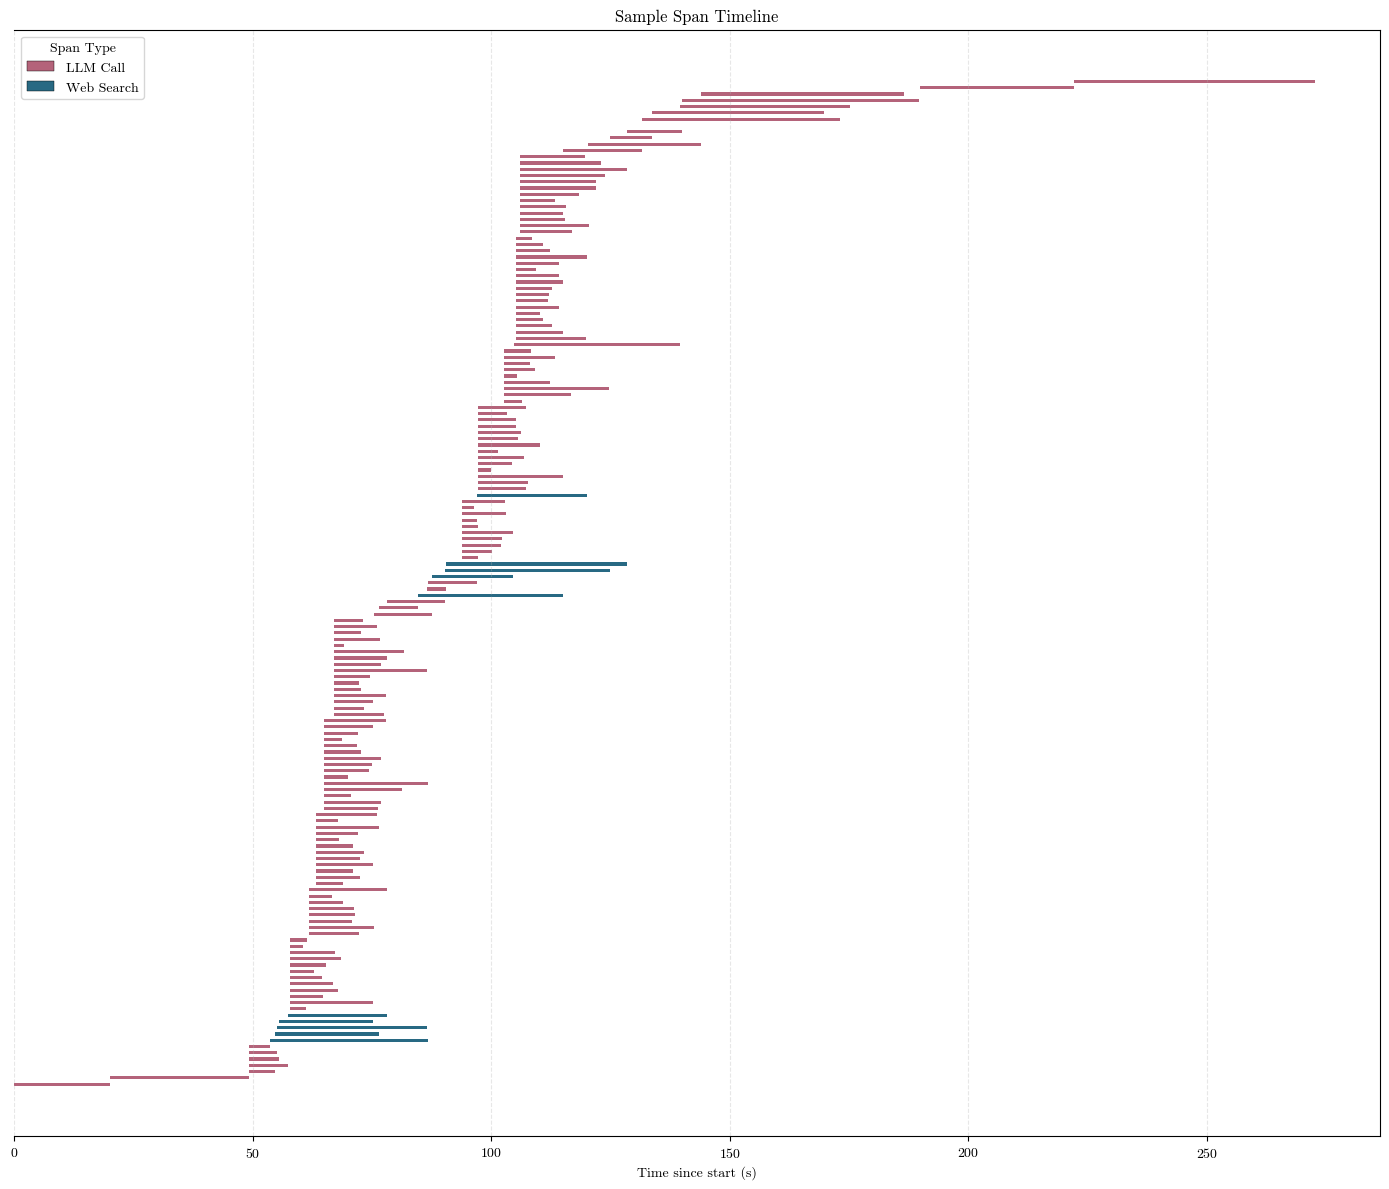

In [44]:
plot_span_timeline(temp, title="Sample Span Timeline")

In [ ]:
# empty blog figure directory, FIG_DIR
import shutil

shutil.rmtree(FIG_DIR)
FIG_DIR.mkdir(parents=True, exist_ok=True)

saved figure to gantt_drb_g25_tav.png
saved figure to gantt_drb_g25_tav.png
saved figure to gantt_drb_g25_tav.png
saved figure to gantt_drb_g25_gen.png
saved figure to gantt_drb_g25_gen.png
saved figure to gantt_drb_g25_gen.png
saved figure to gantt_drb_g3_tav.png
saved figure to gantt_drb_g3_tav.png
saved figure to gantt_drb_g3_tav.png
saved figure to gantt_drb_g3_gen.png
saved figure to gantt_drb_g3_gen.png
saved figure to gantt_drb_g3_gen.png
saved figure to gantt_rb_g25_tav.png
saved figure to gantt_rb_g25_tav.png
saved figure to gantt_rb_g25_tav.png
saved figure to gantt_rb_g25_gen.png
saved figure to gantt_rb_g25_gen.png
saved figure to gantt_rb_g25_gen.png
saved figure to gantt_rb_g3_tav.png
saved figure to gantt_rb_g3_tav.png


/home/matt/dere/gensee_odr/src/open_deep_research/unified_vis.py:105: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(14, height))


saved figure to gantt_rb_g3_tav.png
saved figure to gantt_rb_g3_gen.png
saved figure to gantt_rb_g3_gen.png
saved figure to gantt_rb_g3_gen.png


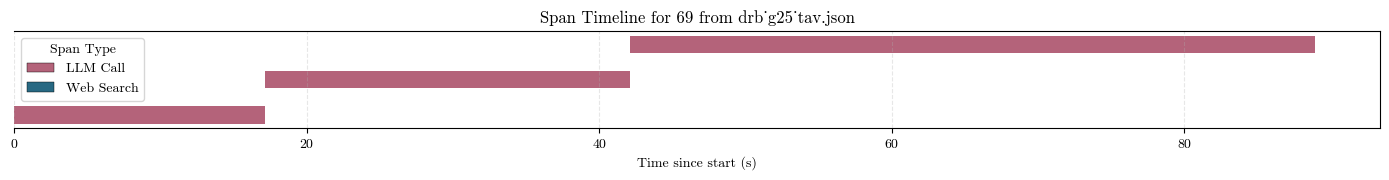

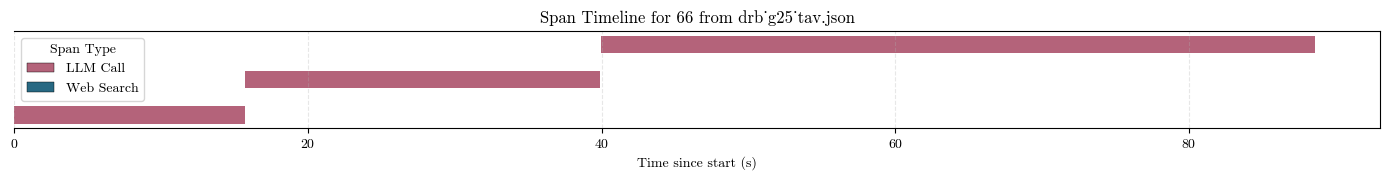

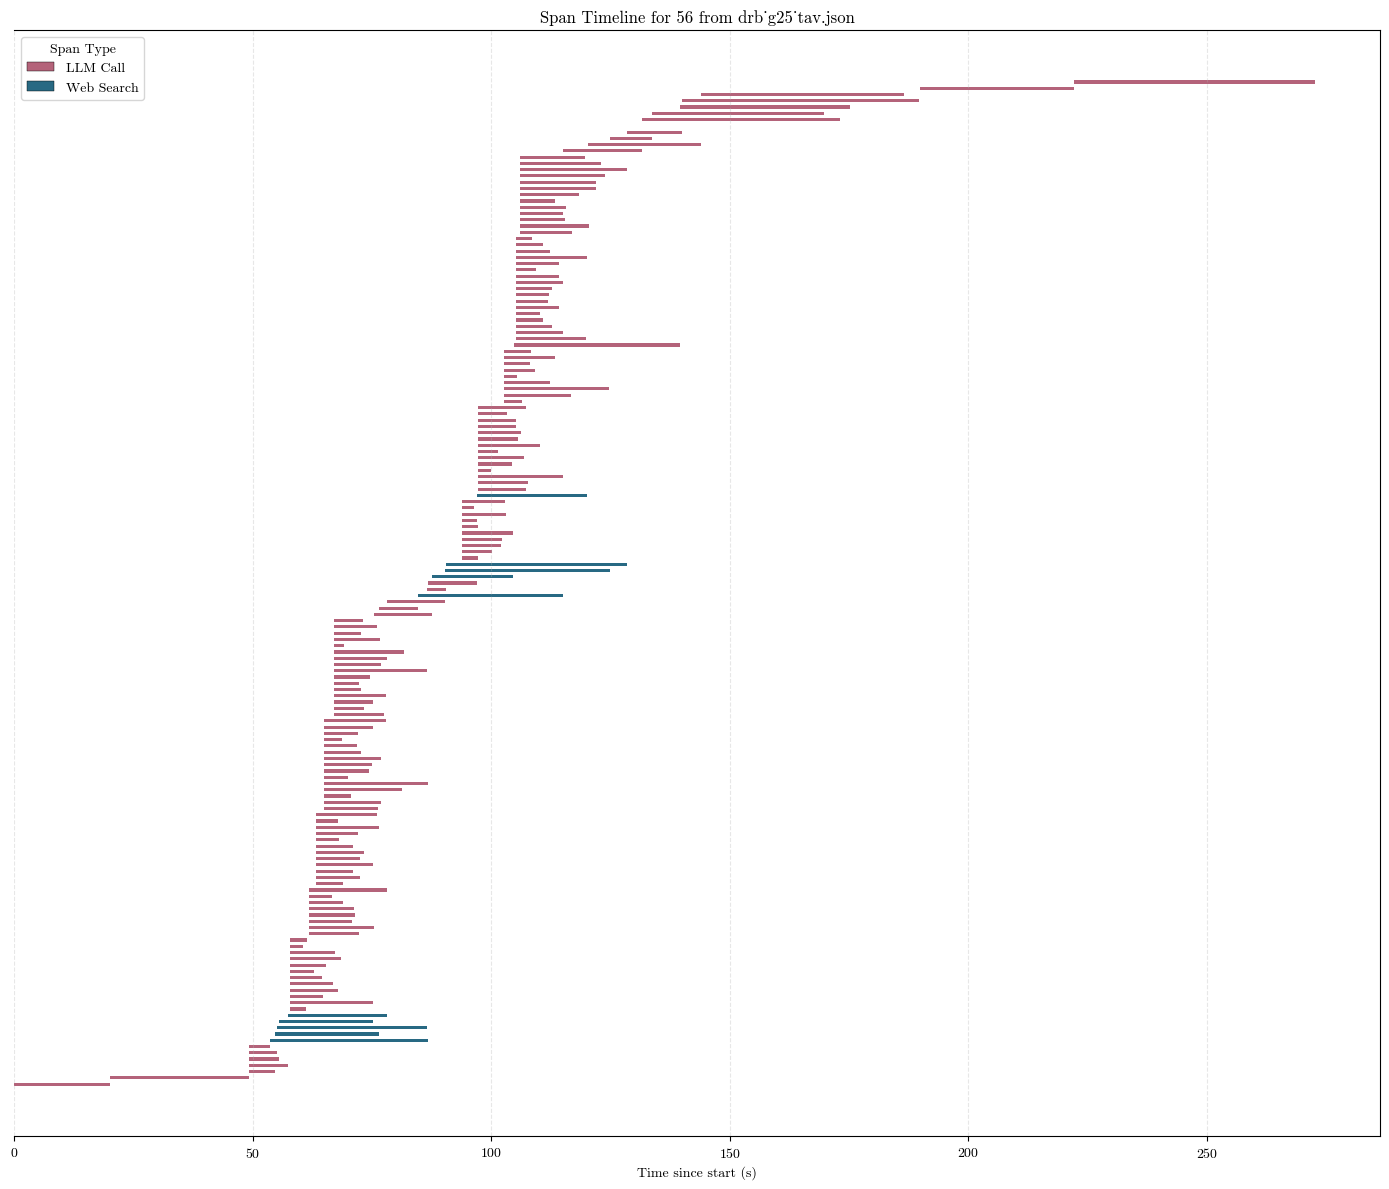

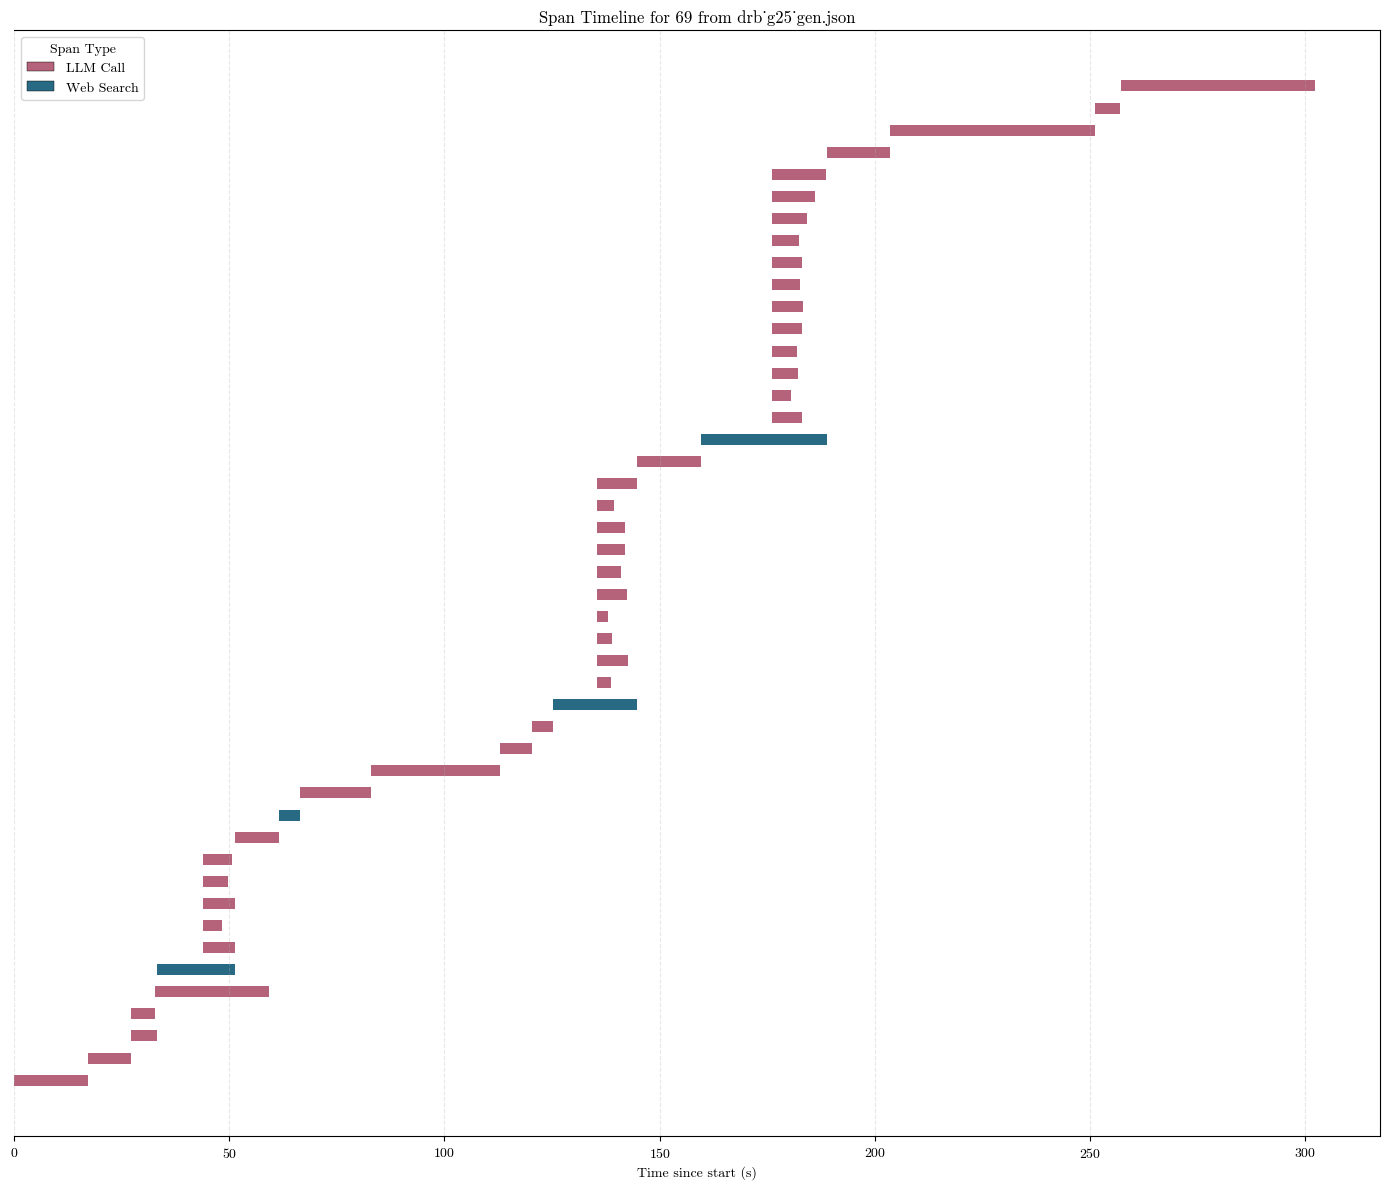

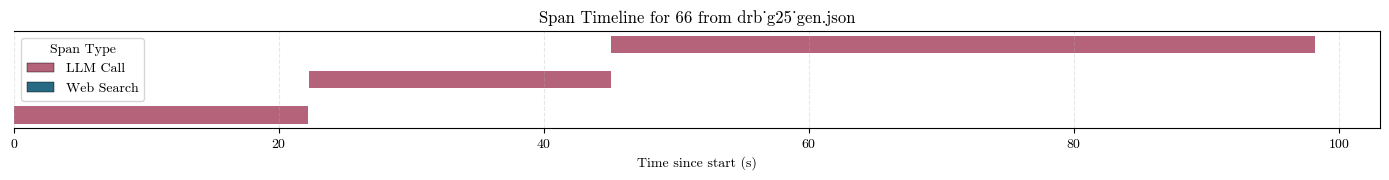

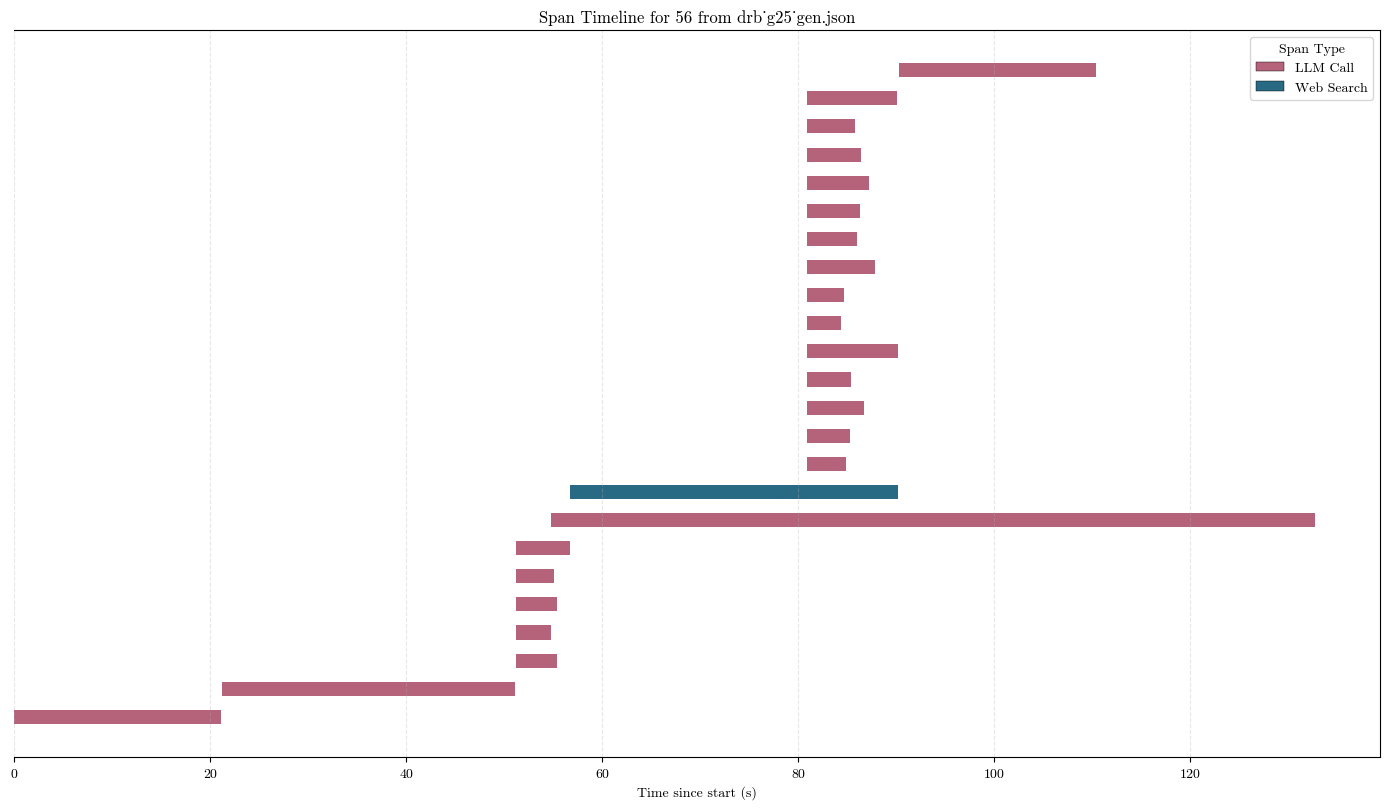

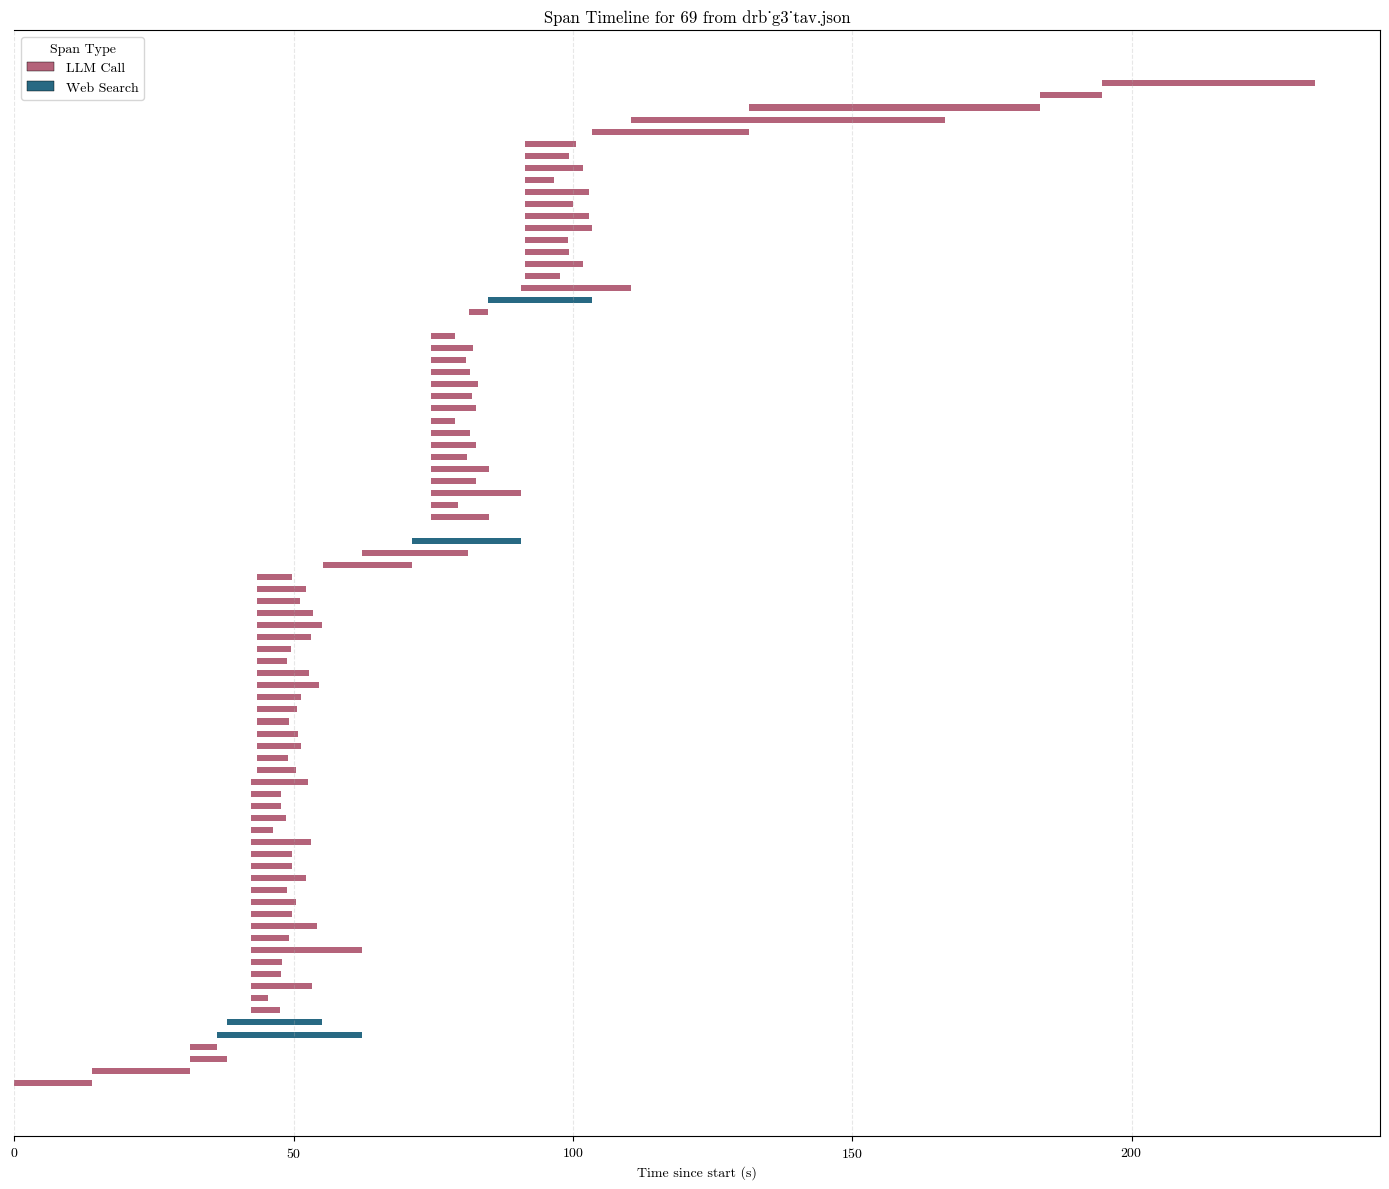

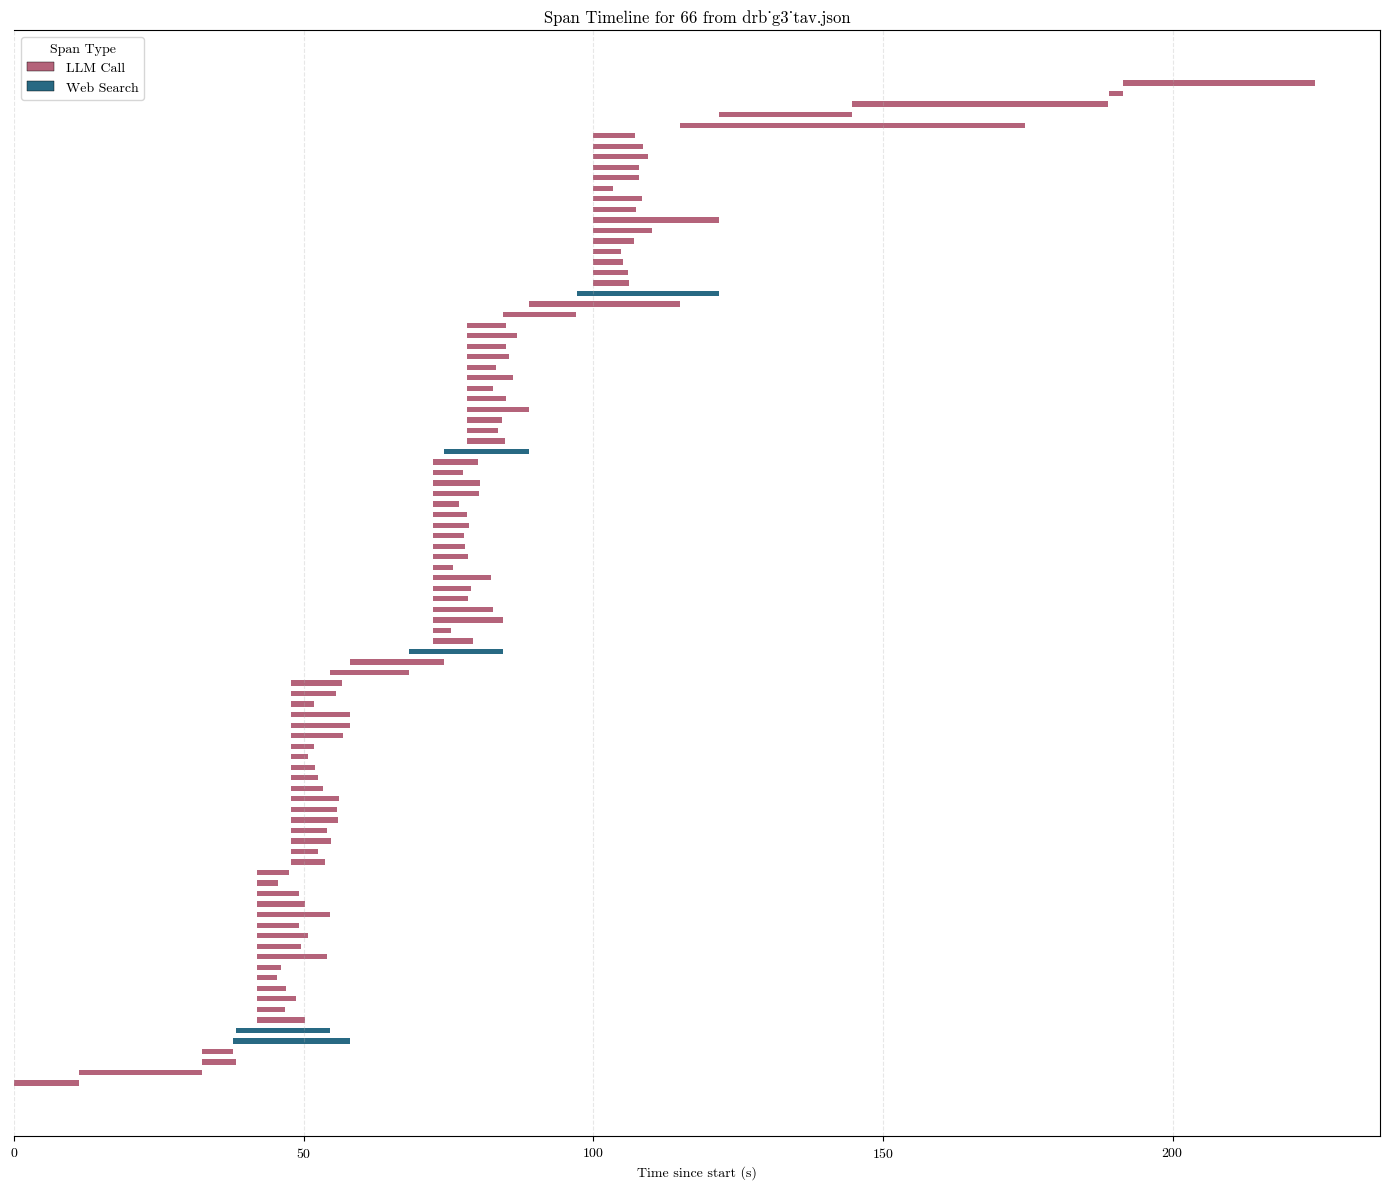

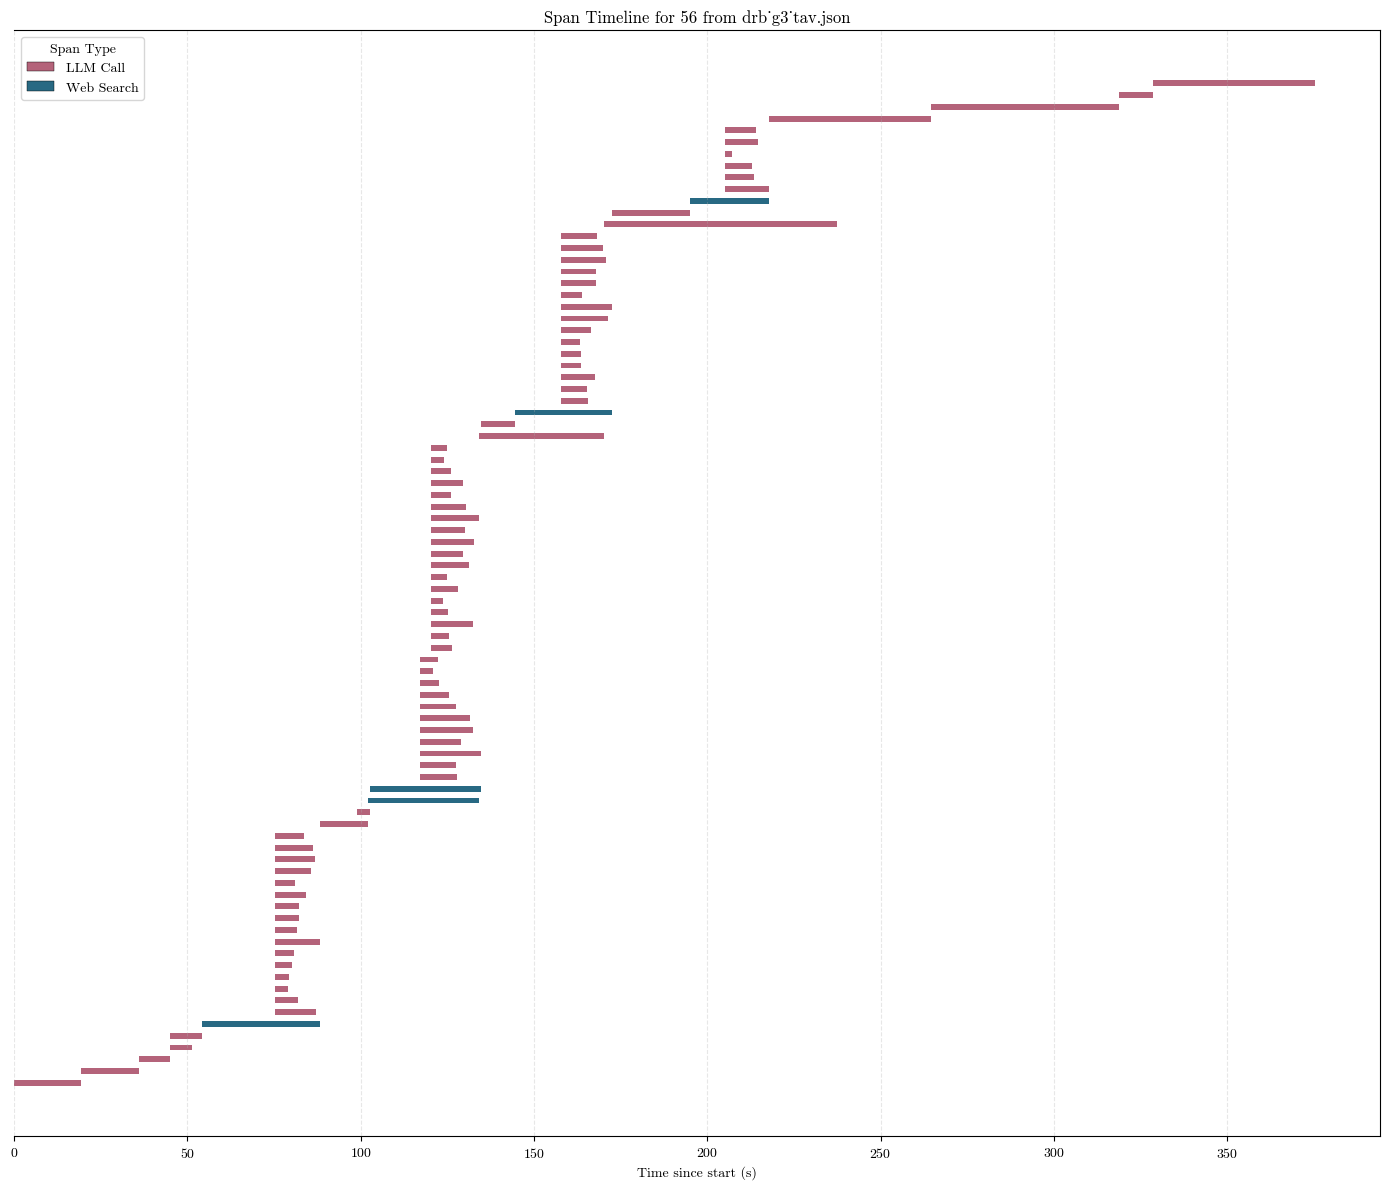

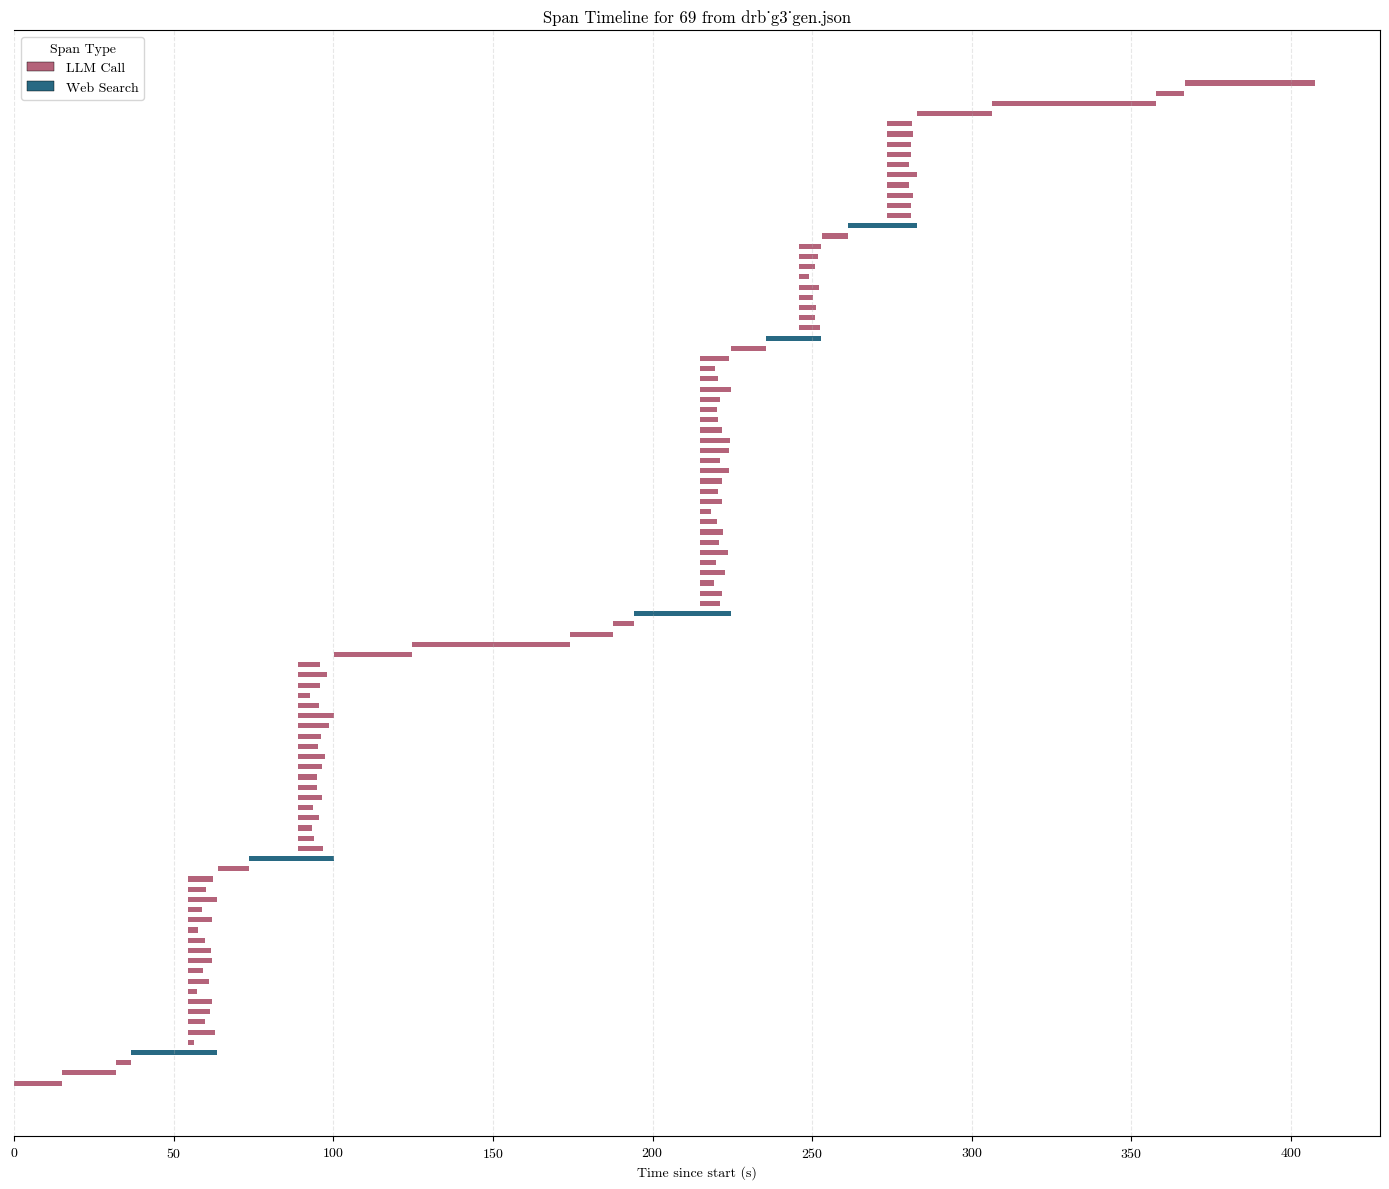

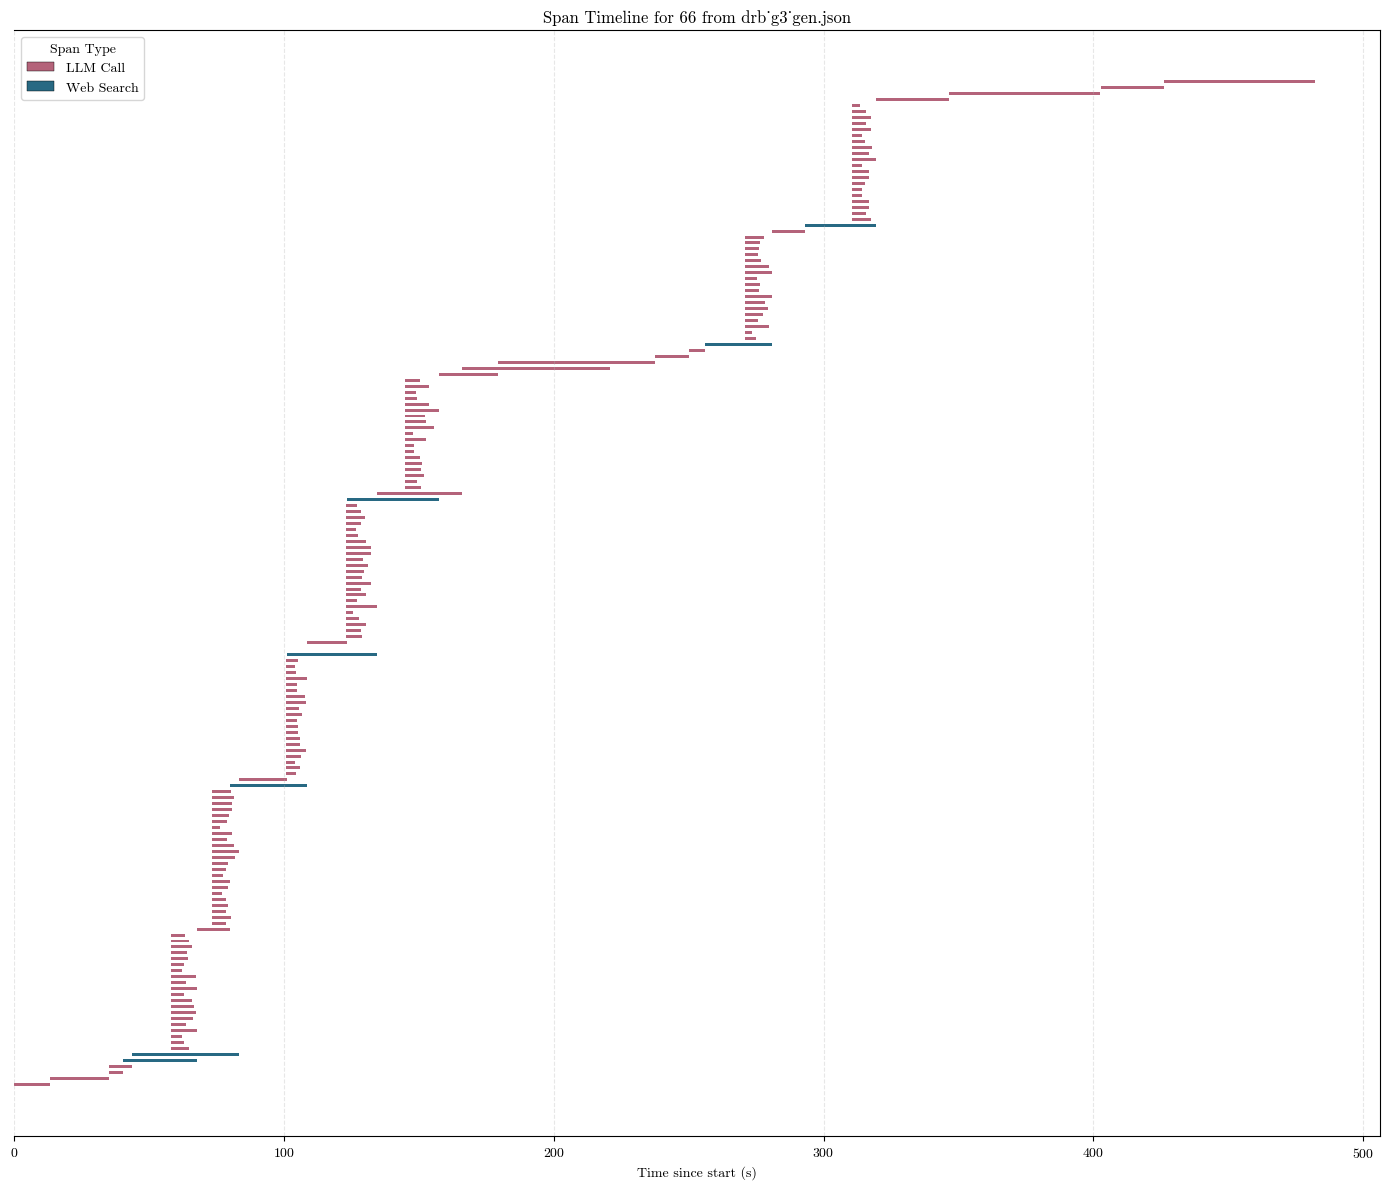

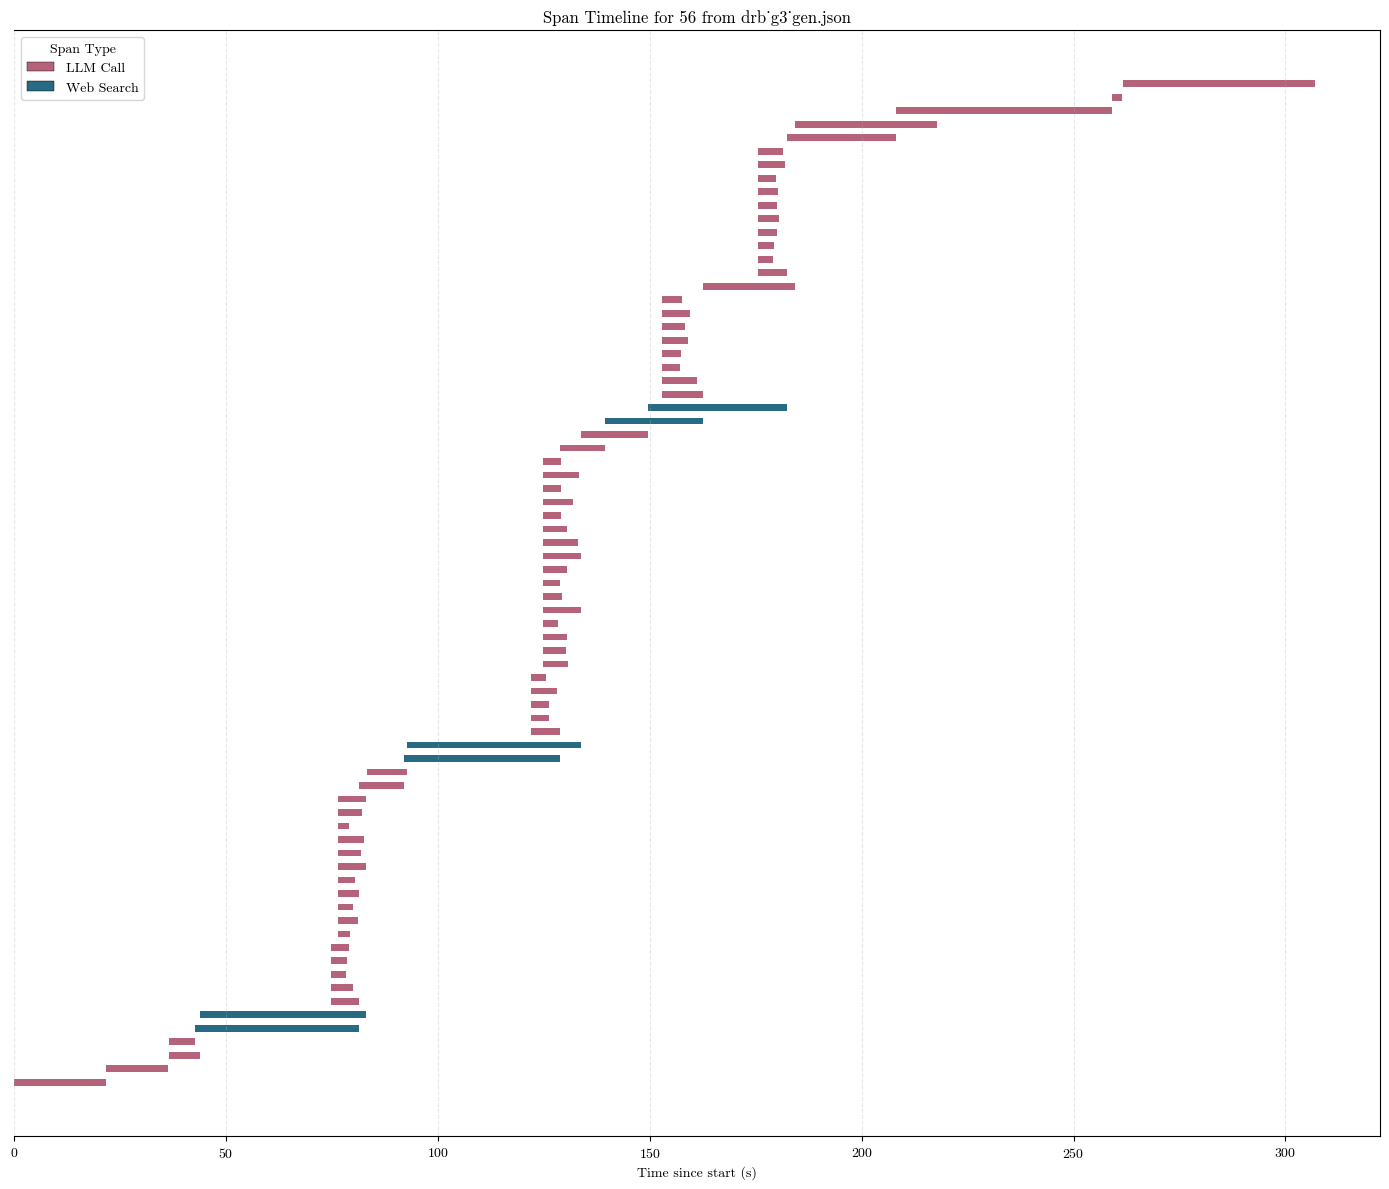

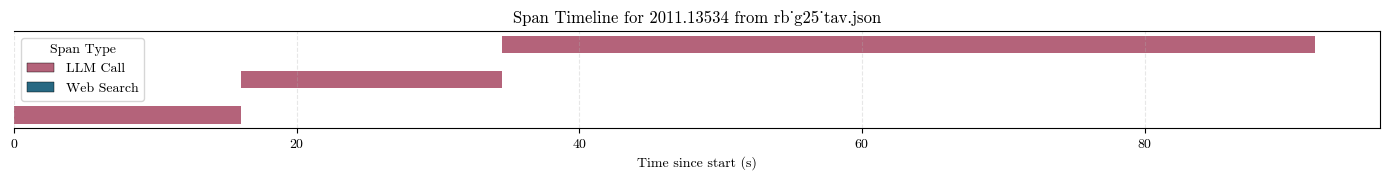

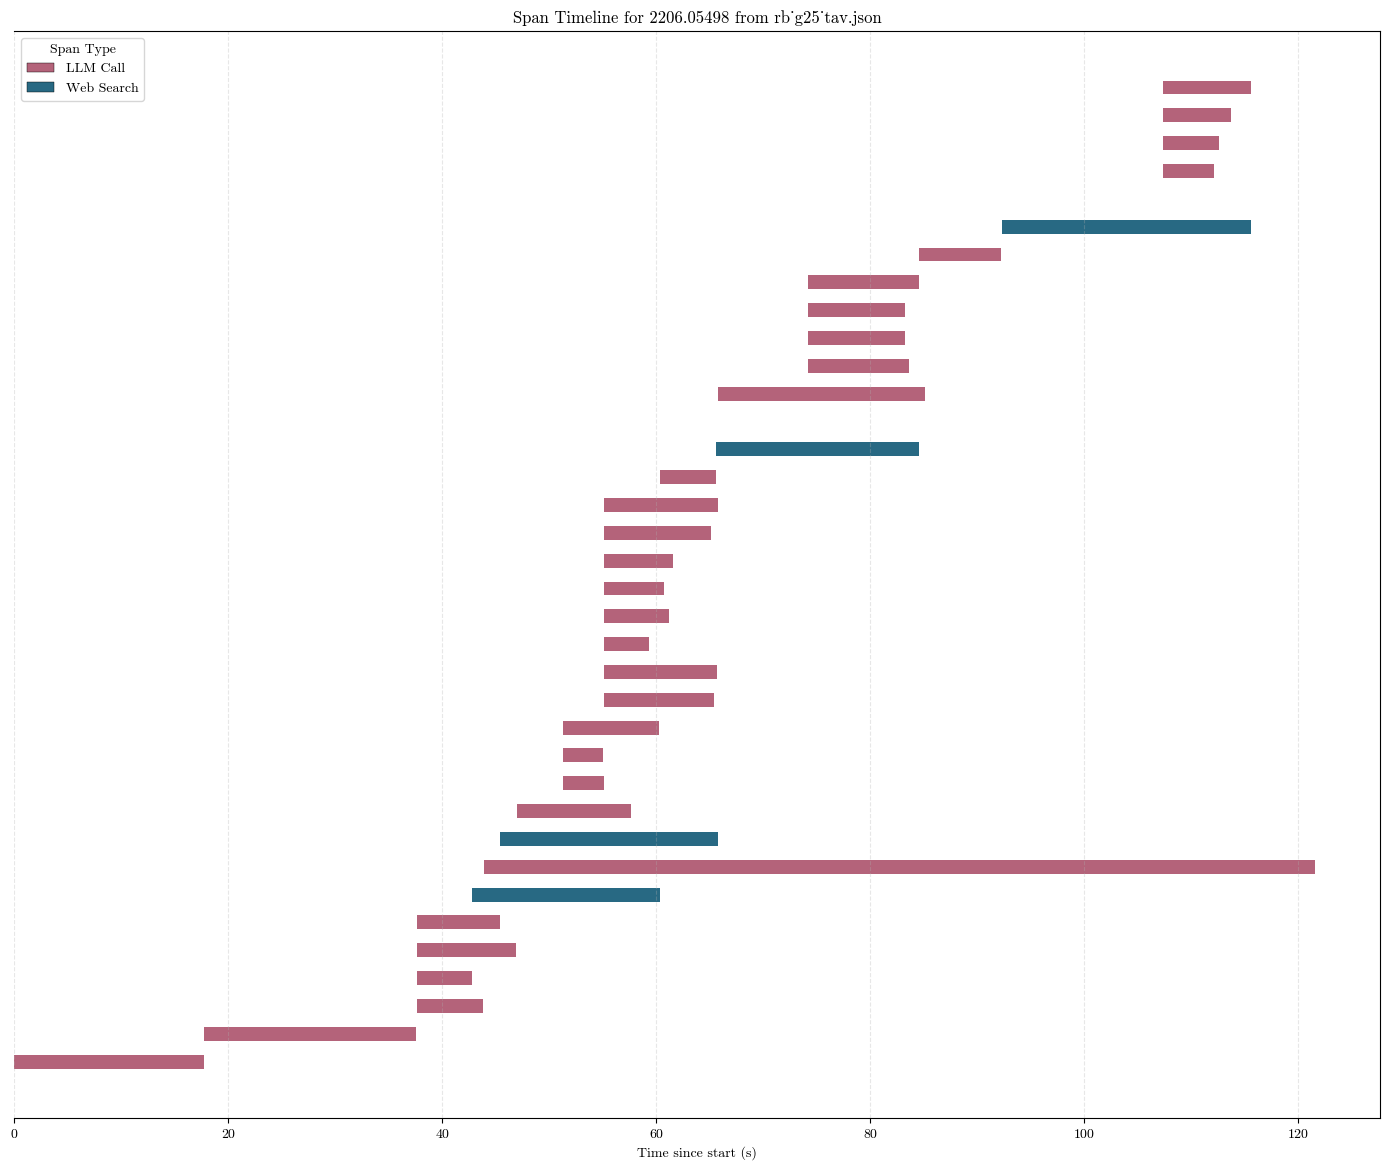

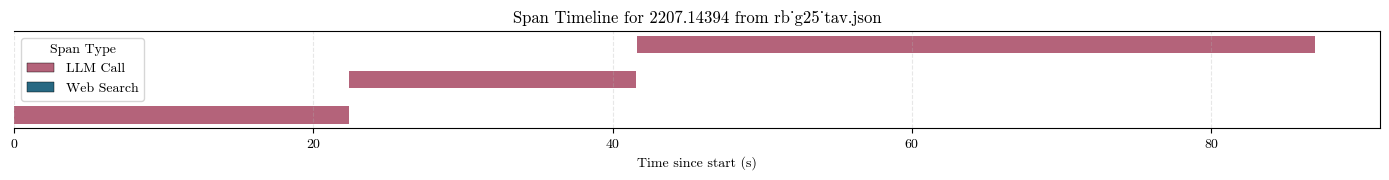

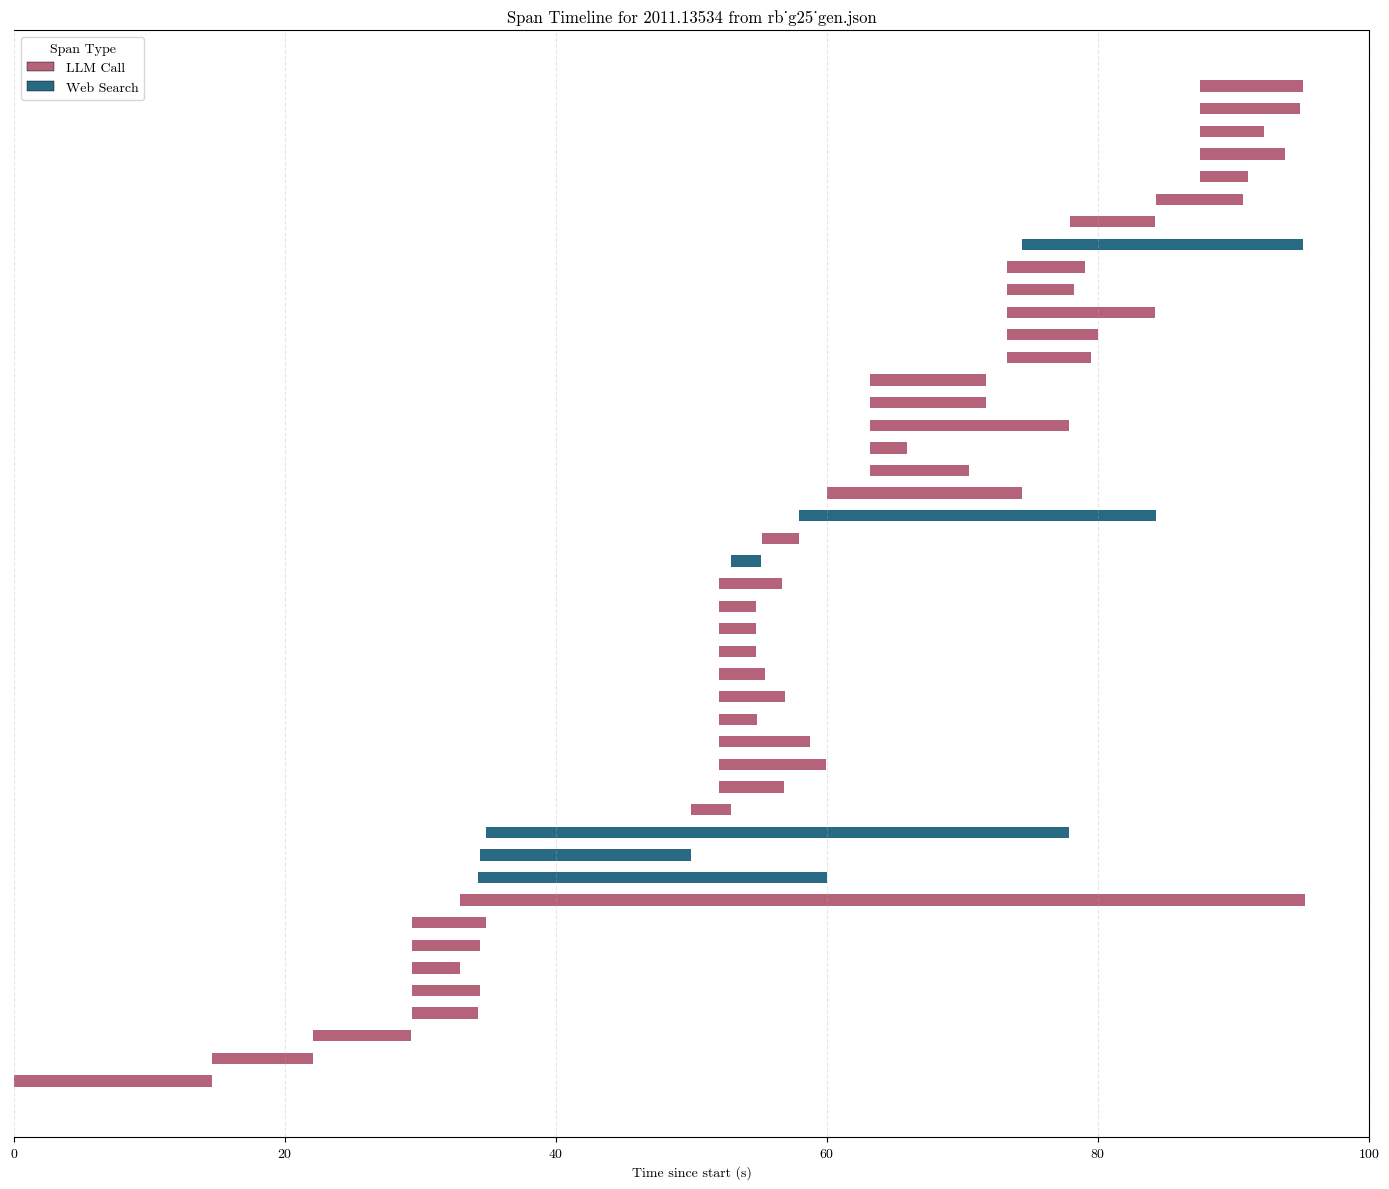

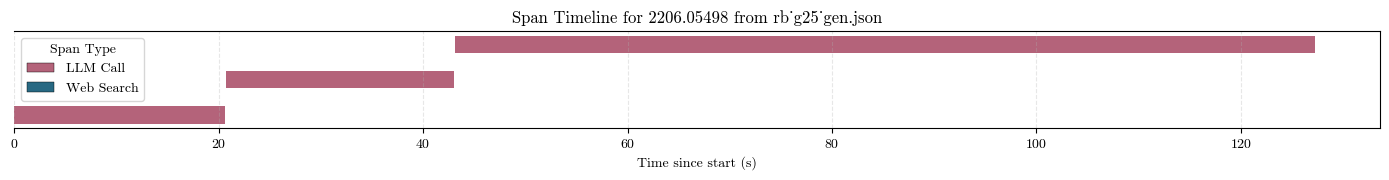

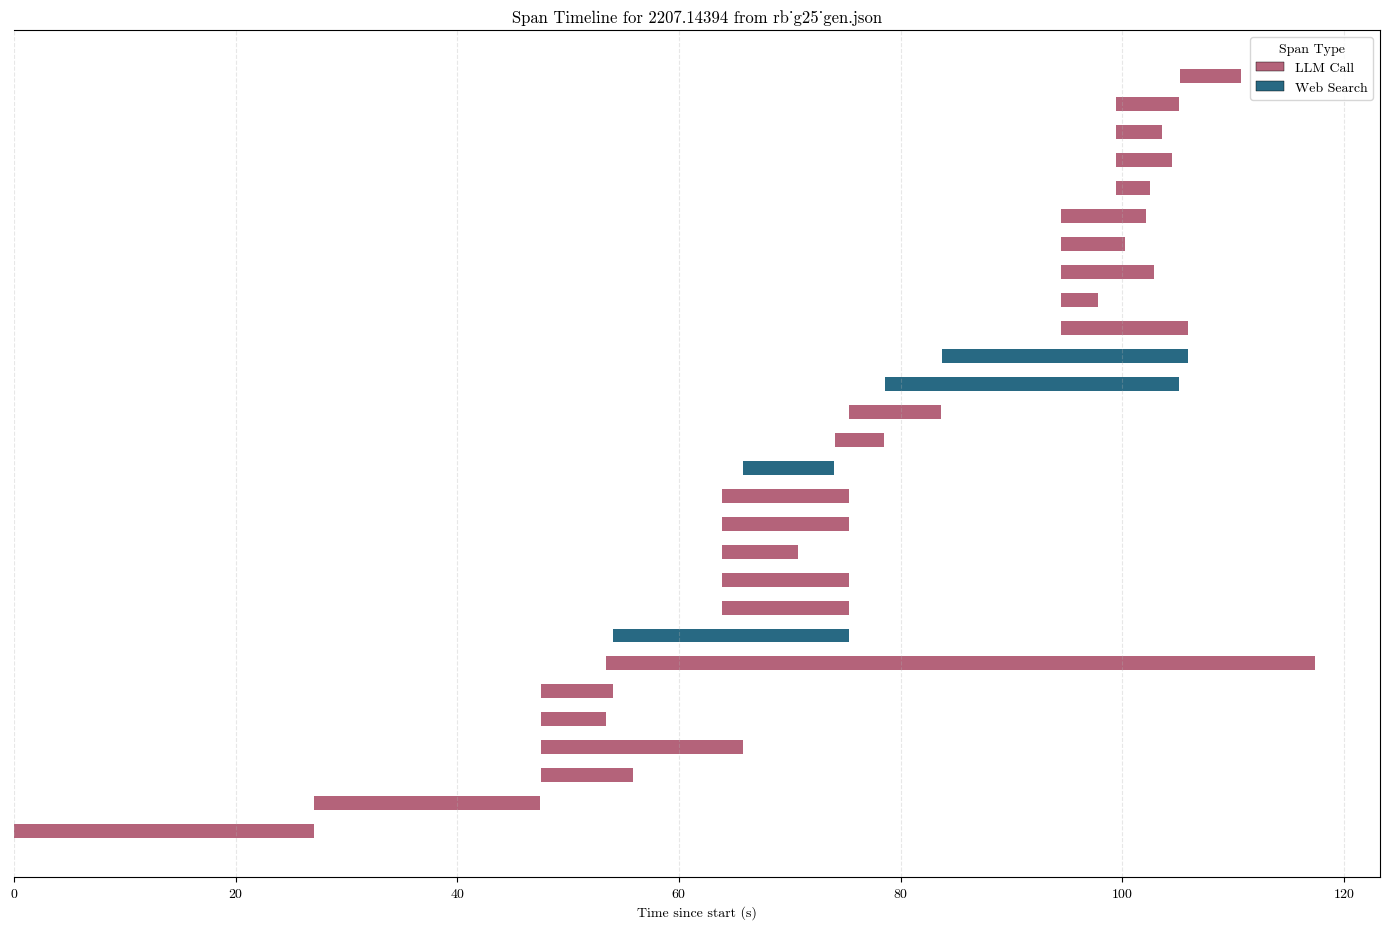

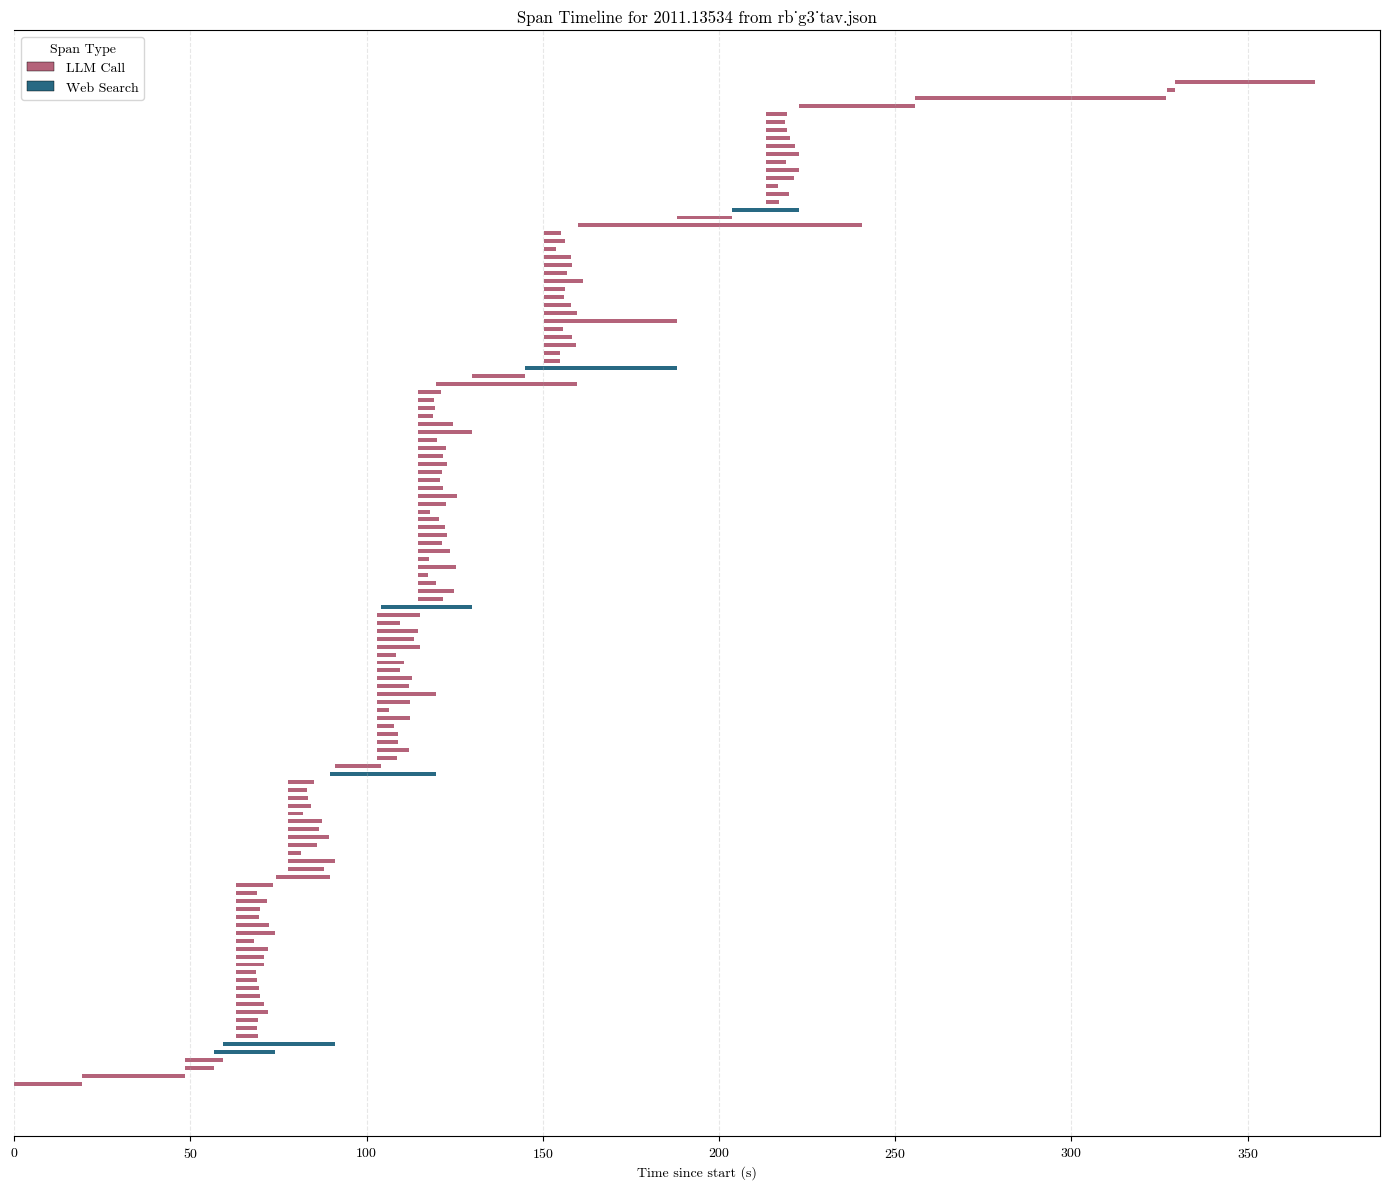

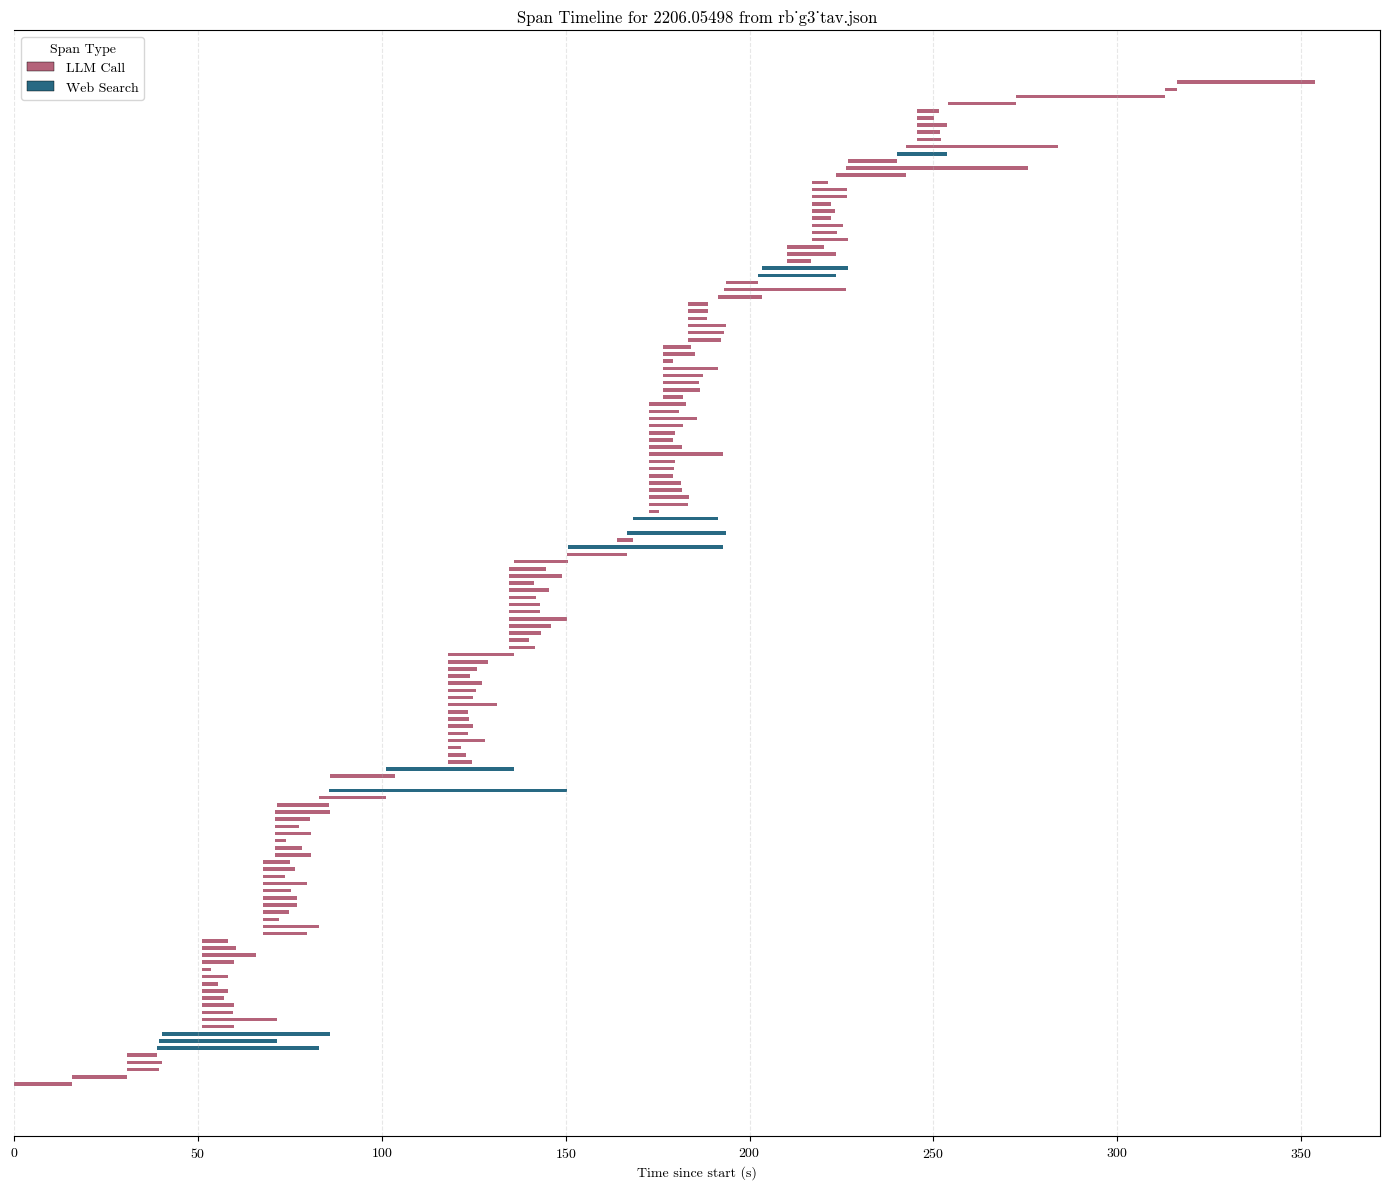

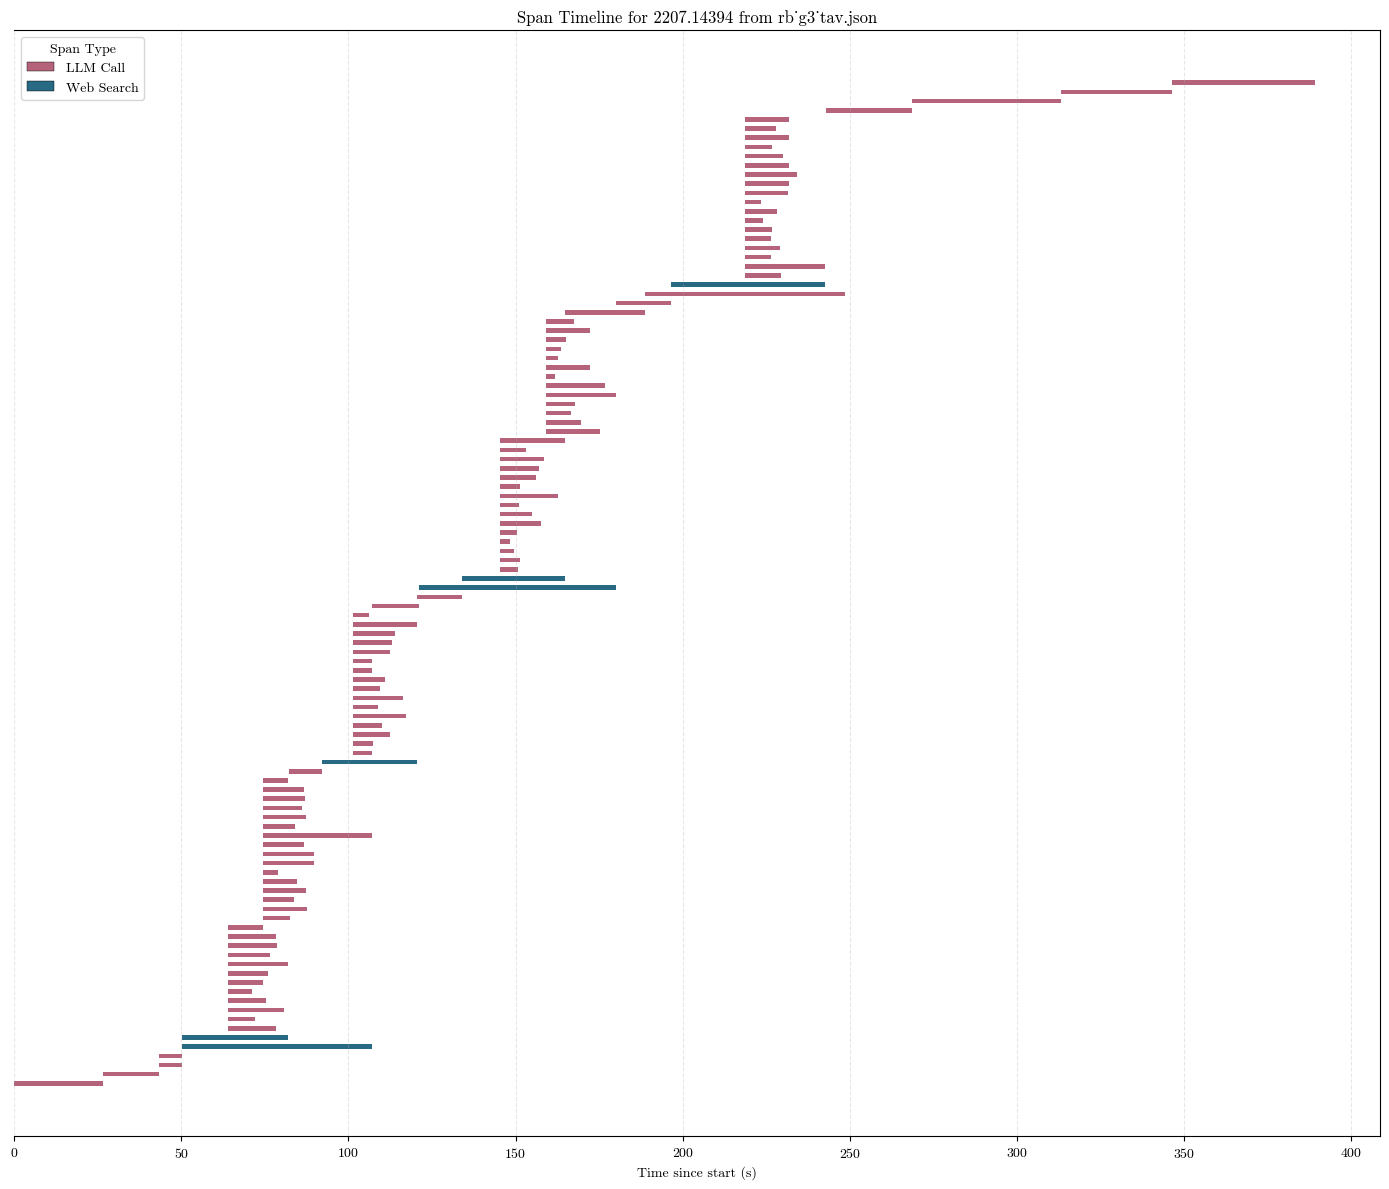

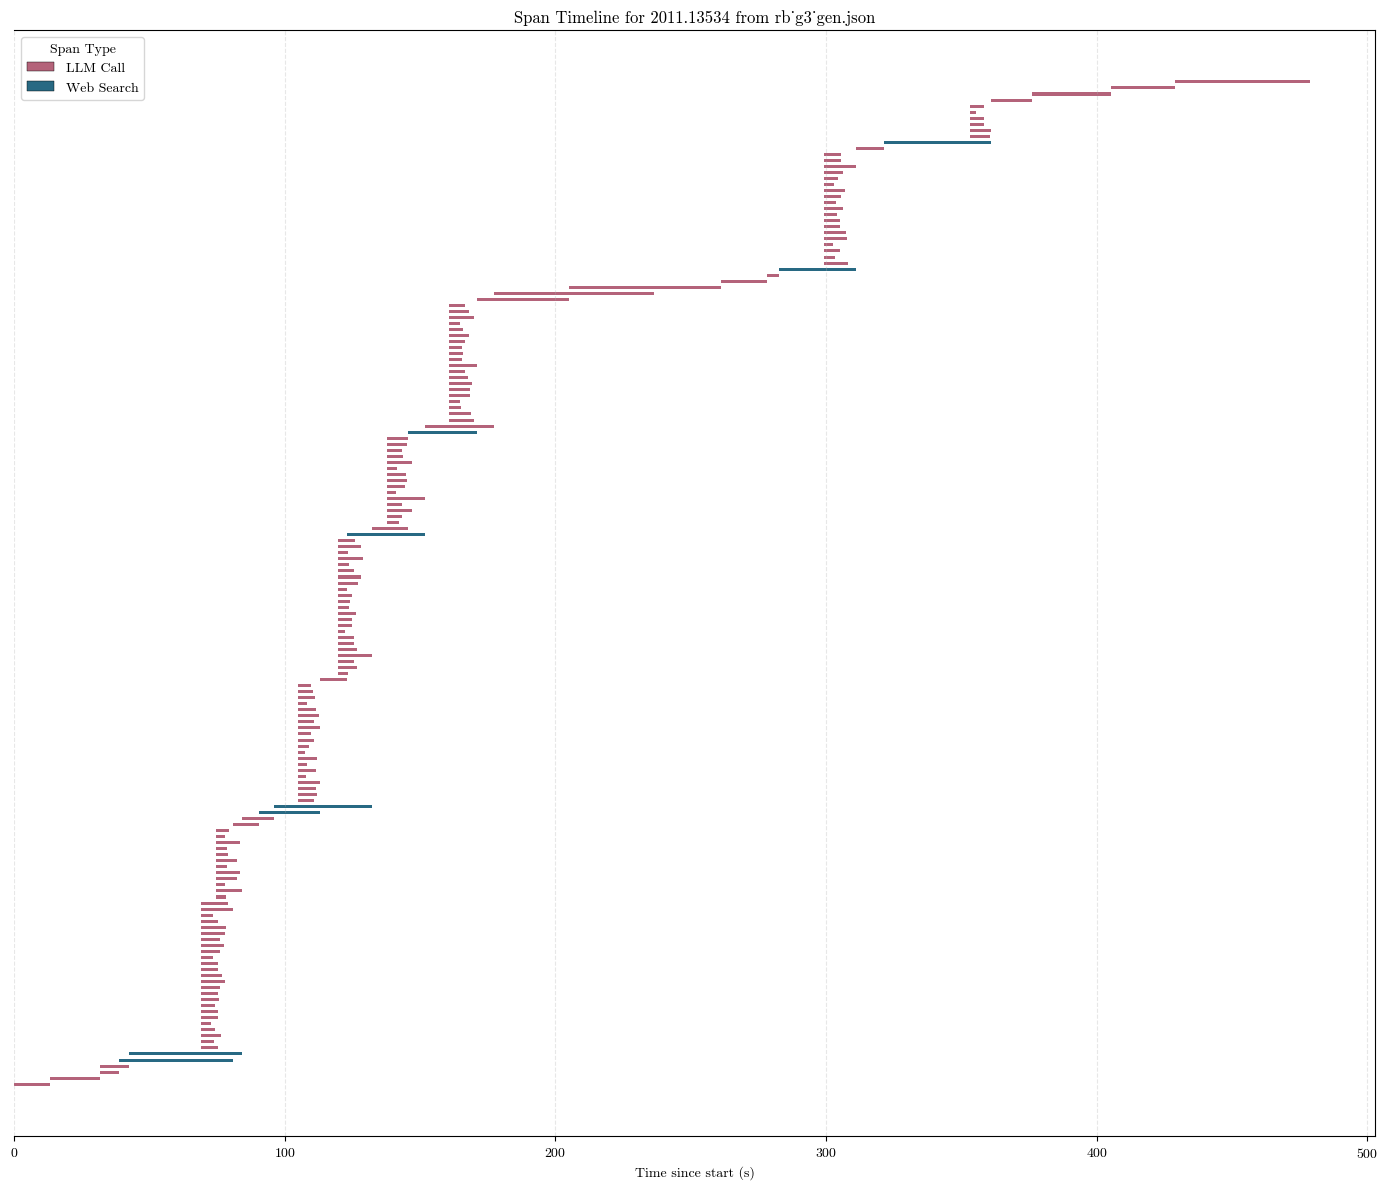

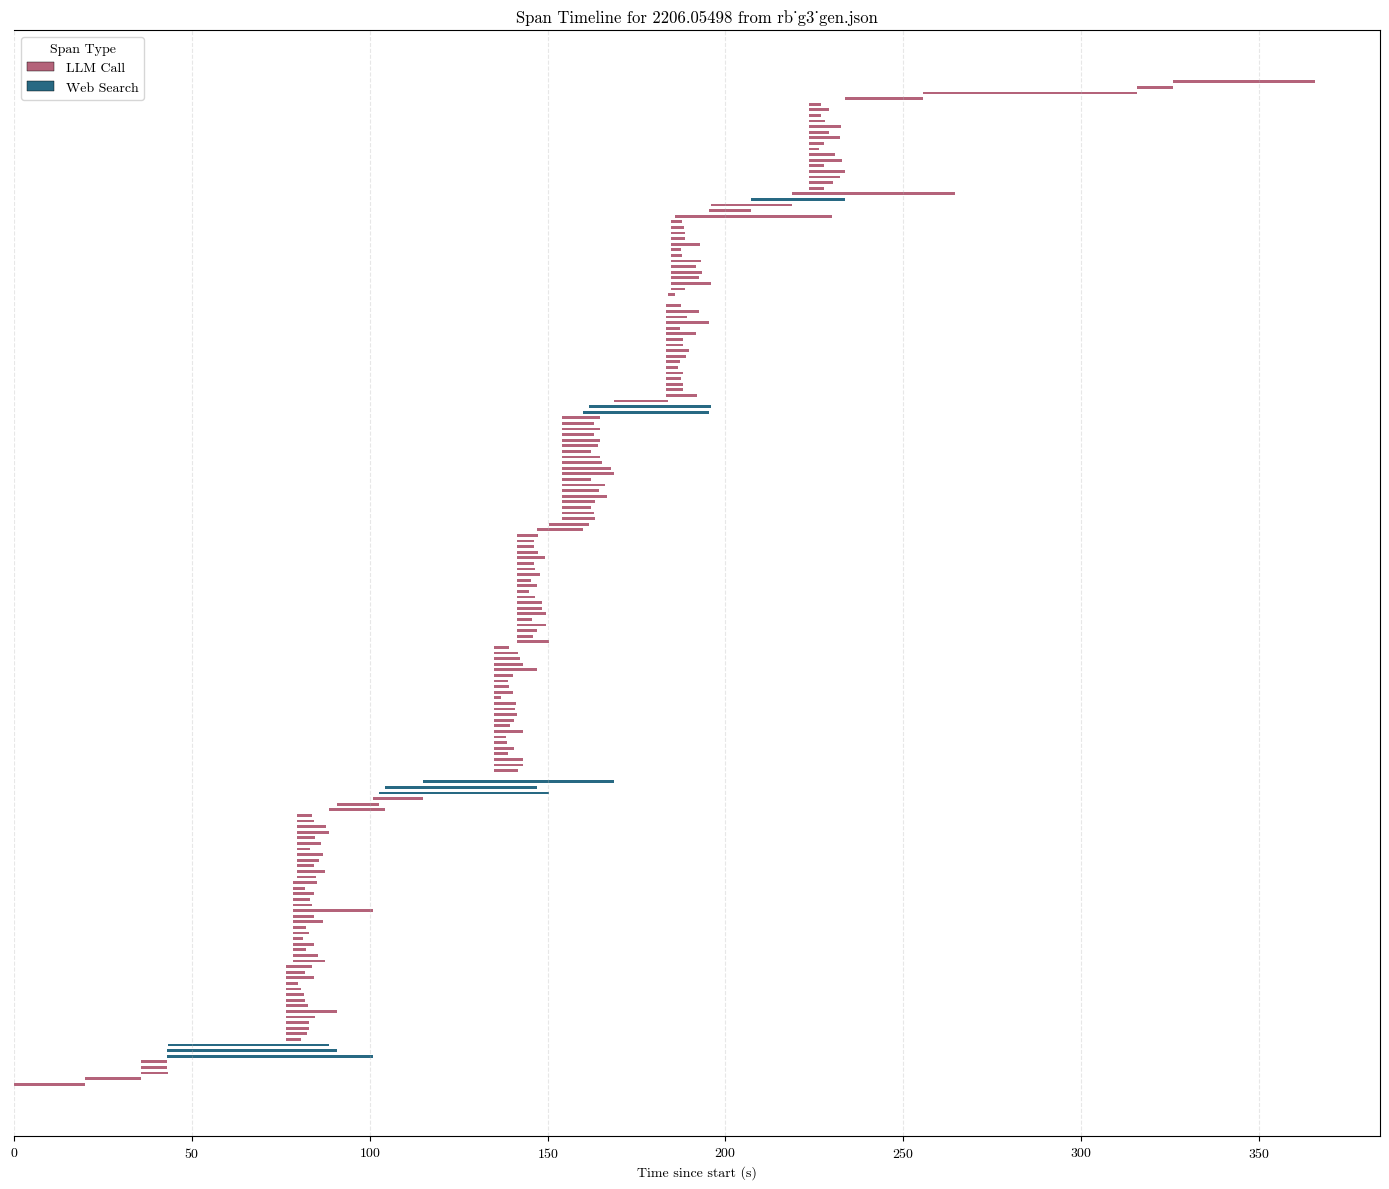

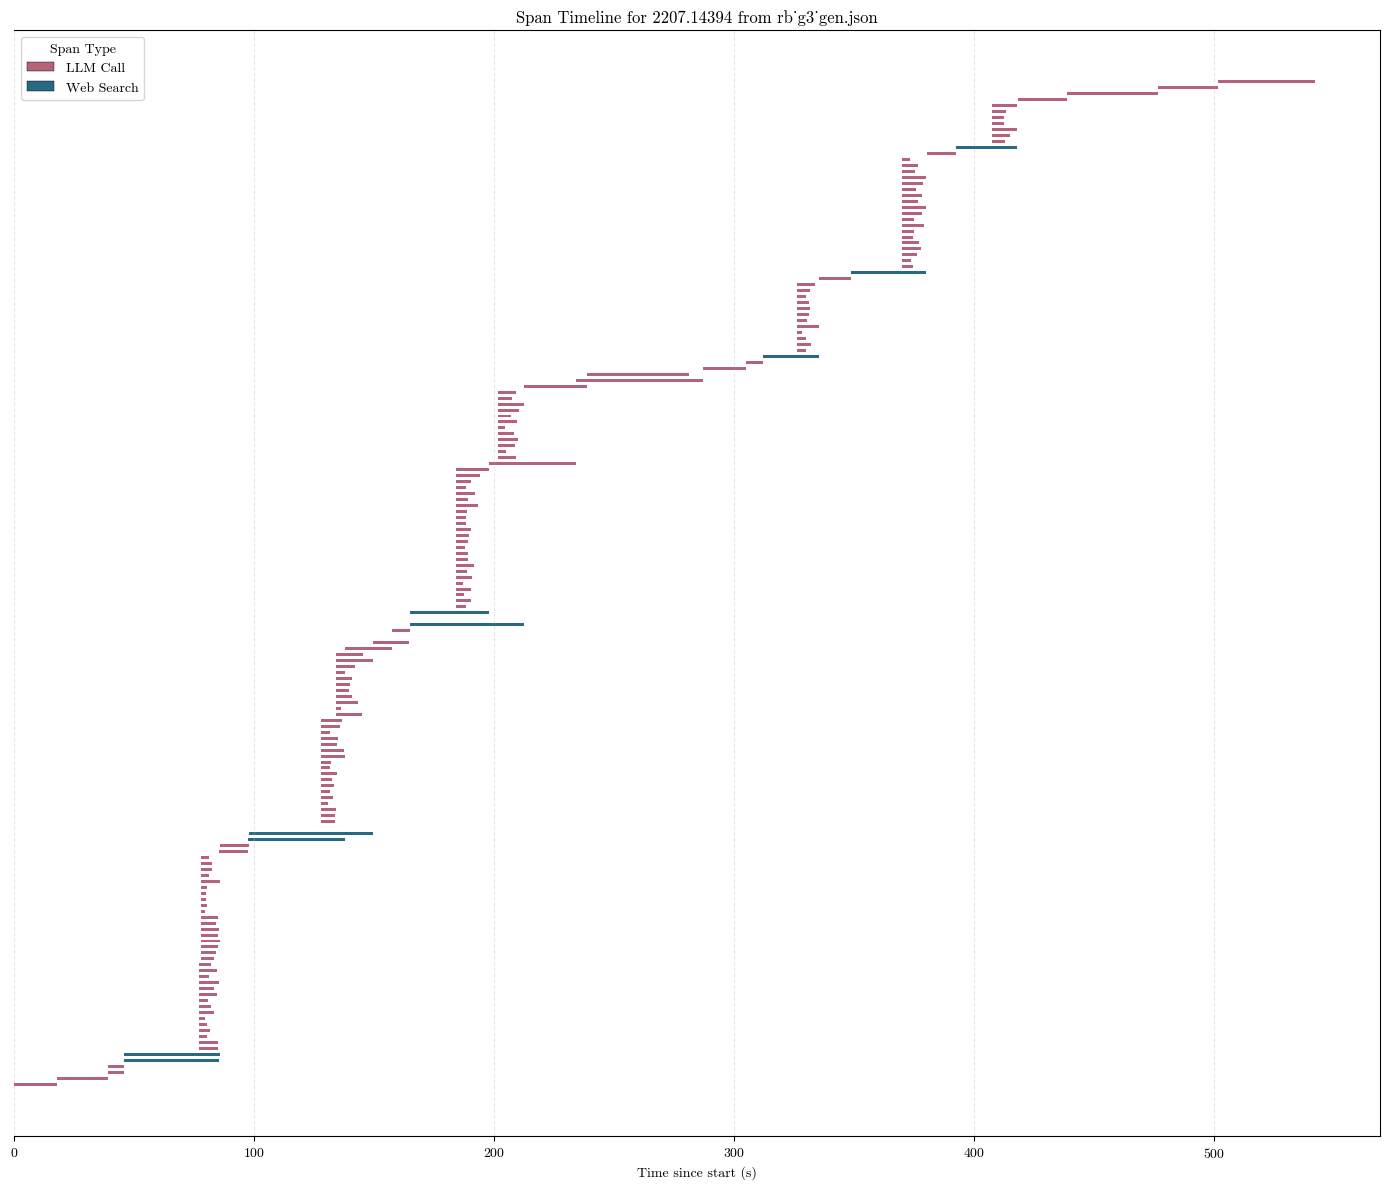

In [53]:
for f_ in drb_outputs + rb_outputs:
    data = json.loads(f_.read_text())
    for k, v in data.items():
        reprocessed = reprocess_spans(v["spans"])
        ax = plot_span_timeline(
            reprocessed,
            title=f"Span Timeline for {k} from {f_.name}",
        )
        ax.figure.savefig(
            FIG_DIR / f"gantt_{k}_{f_.stem}.png",
            dpi=300,
        )
        print(f"saved figure to gantt_{f_.stem}.png")

In [45]:
FIG_DIR = Path("/home/matt/dere/gensee_odr/outputs/blog_figures")
plt.savefig(FIG_DIR / "dummy.png", dpi=300)

<Figure size 640x480 with 0 Axes>

<Axes: title={'center': 'LLM + Web search latency per run'}, ylabel='Total latency (s)'>

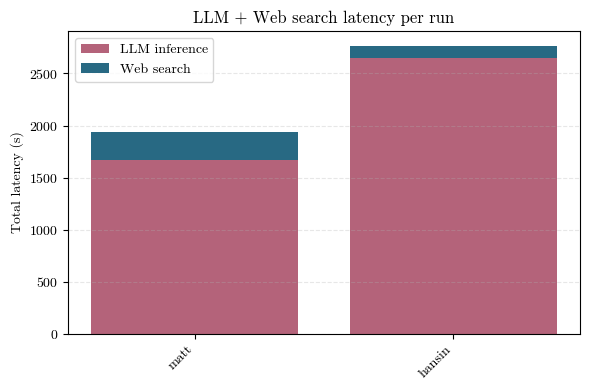

In [ ]:
plot_run_stack_latency(
    {"matt": temp, "hansin": hansin_data},
)

<Axes: title={'center': "Hansin's Task 1 Run Stack Timeline"}, xlabel='Time since start (s)'>

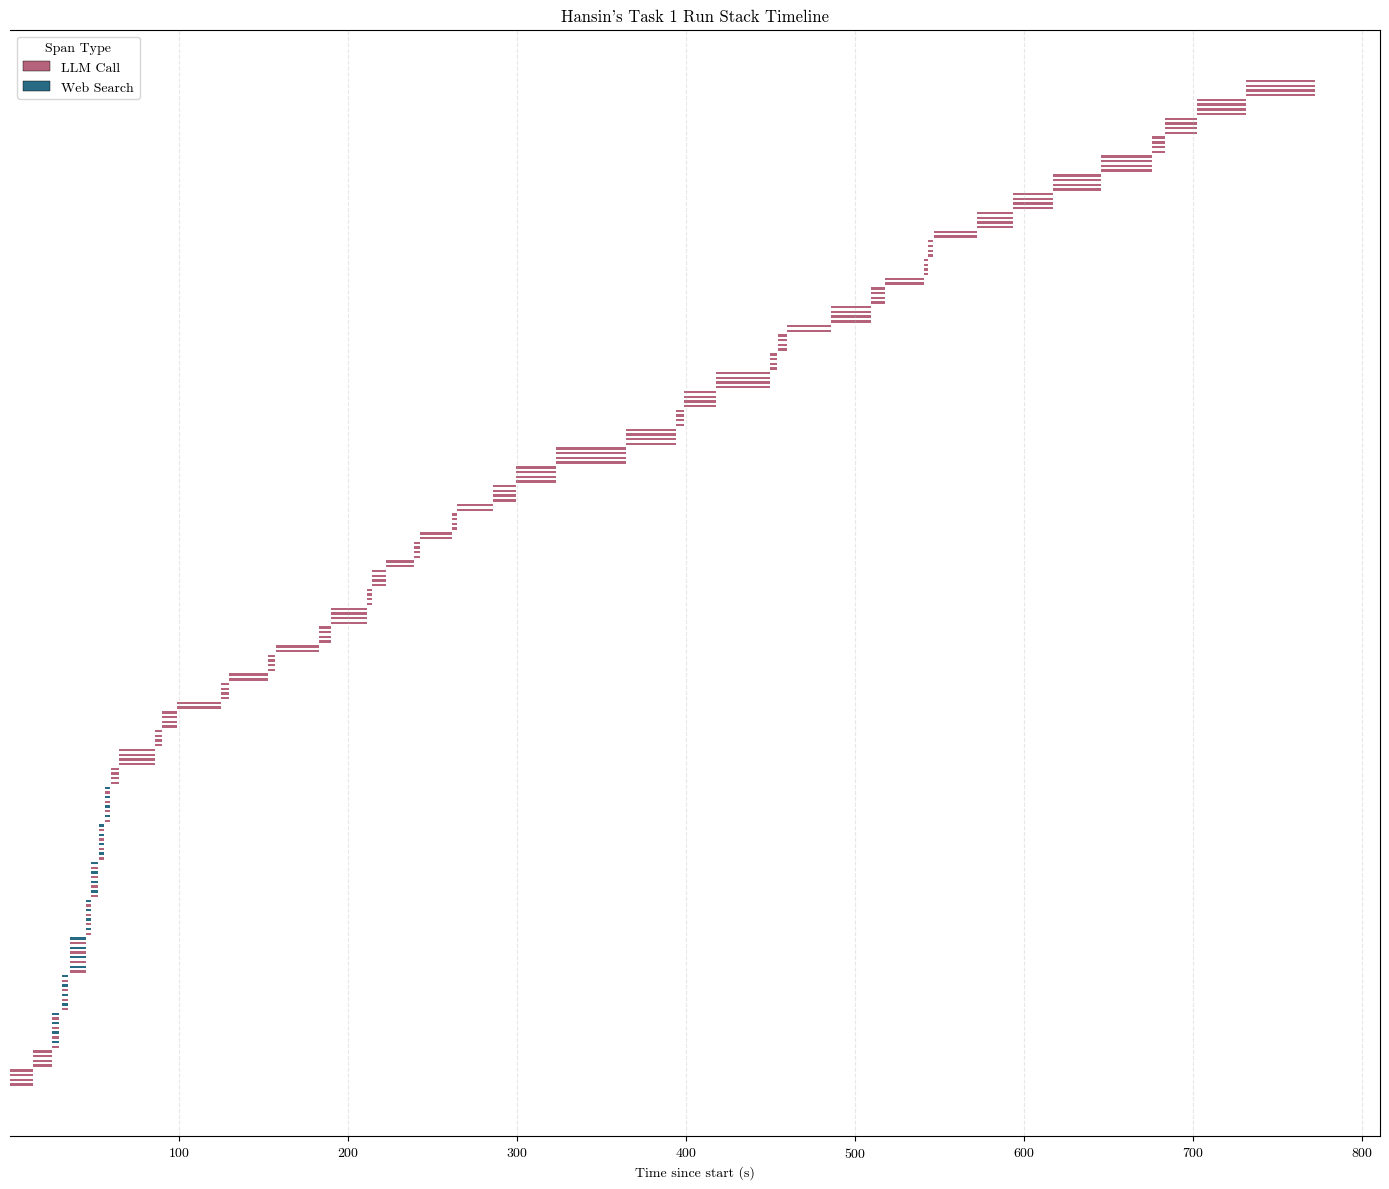

In [59]:
plot_span_timeline(
    hansin_data,
    title="Hansin's Task 1 Run Stack Timeline",
)

In [58]:
hansin_data

[{'type': 'llm_call',
  'start': '2025-12-07T10:19:30.032Z',
  'stop': '2025-12-07T10:19:43.509Z'},
 {'type': 'llm_call',
  'start': '2025-12-07T10:19:30.032Z',
  'stop': '2025-12-07T10:19:43.509Z'},
 {'type': 'llm_call',
  'start': '2025-12-07T10:19:30.033Z',
  'stop': '2025-12-07T10:19:43.508Z'},
 {'type': 'llm_call',
  'start': '2025-12-07T10:19:30.033Z',
  'stop': '2025-12-07T10:19:43.508Z'},
 {'type': 'llm_call',
  'start': '2025-12-07T10:19:43.513Z',
  'stop': '2025-12-07T10:19:54.774Z'},
 {'type': 'llm_call',
  'start': '2025-12-07T10:19:43.513Z',
  'stop': '2025-12-07T10:19:54.774Z'},
 {'type': 'llm_call',
  'start': '2025-12-07T10:19:43.515Z',
  'stop': '2025-12-07T10:19:54.773Z'},
 {'type': 'llm_call',
  'start': '2025-12-07T10:19:43.515Z',
  'stop': '2025-12-07T10:19:54.773Z'},
 {'type': 'llm_call',
  'start': '2025-12-07T10:19:54.796Z',
  'stop': '2025-12-07T10:19:59.295Z'},
 {'type': 'web_search',
  'start': '2025-12-07T10:19:54.796Z',
  'stop': '2025-12-07T10:19:59.295Z'}